In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r'C:/Users/Admin/Downloads/МН/chocolate_bars.csv')
df.head(20)

id manufacturer company_location  year_reviewed         bean_origin  \
0   2454         5150           U.S.A.           2019            Tanzania   
1   2458         5150           U.S.A.           2019  Dominican Republic   
2   2454         5150           U.S.A.           2019          Madagascar   
3   2542         5150           U.S.A.           2021                Fiji   
4   2546         5150           U.S.A.           2021           Venezuela   
5   2546         5150           U.S.A.           2021              Uganda   
6   2542         5150           U.S.A.           2021               India   
7    797     A. Morin           France           2012             Bolivia   
8    797     A. Morin           France           2012                Peru   
9   1011     A. Morin           France           2013              Panama   
10  1015     A. Morin           France           2013            Colombia   
11  1011     A. Morin           France           2013          Madagascar   
12  1015     A. Morin           France           2013               Burma   
13  1011     A. Morin           France           2013              Brazil   
14  1015     A. Morin           France           2013    Papua New Guinea   
15  1019     A. Morin           France           2013                Peru   
16  1019     A. Morin           France           2013                Peru   
17  1011     A. Morin           France           2013             Ecuador   
18  1015     A. Morin           France           2013           Venezuela   
19  1019     A. Morin           France           2013                Peru   

                    bar_name  cocoa_percent  num_ingredients ingredients  \
0      Kokoa Kamili, batch 1           76.0              3.0       B,S,C   
1            Zorzal, batch 1           76.0              3.0       B,S,C   
2     Bejofo Estate, batch 1           76.0              3.0       B,S,C   
3      Matasawalevu, batch 1           68.0              3.0       B,S,C   
4      Sur del Lago, batch 1           72.0              3.0       B,S,C   
5   Semuliki Forest, batch 1           80.0              3.0       B,S,C   
6          Anamalai, batch 1           68.0              3.0       B,S,C   
7                    Bolivia           70.0              4.0     B,S,C,L   
8                       Peru           63.0              4.0     B,S,C,L   
9                     Panama           70.0              4.0     B,S,C,L   
10                  Colombie           70.0              4.0     B,S,C,L   
11       Madagascar, Criollo           70.0              4.0     B,S,C,L   
12                  Birmanie           70.0              4.0     B,S,C,L   
13                    Brazil           70.0              4.0     B,S,C,L   
14          Papua New Guinea           70.0              4.0     B,S,C,L   
15                     Piura           70.0              4.0     B,S,C,L   
16      Chanchamayo Province           70.0              4.0     B,S,C,L   
17                  Equateur           70.0              4.0     B,S,C,L   
18                     Chuao           70.0              4.0     B,S,C,L   
19      Chanchamayo Province           63.0              3.0       B,S,C   

                               review  rating  
0           rich cocoa, fatty, bready    3.25  
1              cocoa, vegetal, savory    3.50  
2        cocoa, blackberry, full body    3.75  
3                 chewy, off, rubbery    3.00  
4   fatty, earthy, moss, nutty,chalky    3.00  
5   mildly bitter, basic cocoa, fatty    3.25  
6       milk brownie, macadamia,chewy    3.50  
7                      vegetal, nutty    3.50  
8               fruity, melon, roasty    3.75  
9     brief fruit note, earthy, nutty    2.75  
10       burnt rubber,alkalyzed notes    2.75  
11            sticky, red fruit, sour    3.00  
12              sticky, smokey, grass    3.00  
13                       mild tobacco    3.25  
14           mild fruit, strong smoke    3.25  
15                green

Первинний аналіз даних: к-сть даних та кількість змінних, типи дани вхідних та вихідної змінної.


In [3]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.6+ KB
(2530, 11)


In [4]:
most_common_value = df['ingredients'].mode()[0]
most_common_value1 = df['num_ingredients'].mode()[0]
# Заповнення пропущених значень найповторюванішим значенням
df['ingredients'] = df['ingredients'].fillna(most_common_value)
df['num_ingredients'] = df['num_ingredients'].fillna(most_common_value1)

 7   num_ingredients   2443 non-null   float64  
 8   ingredients       2443 non-null   object   
 Набір даних складається переважно з 2530 рядочків, але є стовпці в яких їх кількість менша у стовпці: num_ingredients і ingredients.(в них їх кількість складає 2443, що свідчить про пропущенні данні)

In [5]:
df["ingredients"].value_counts()

ingredients
B,S,C           1086
B,S              718
B,S,C,L          286
B,S,C,V,L        184
B,S,C,V          141
B,S*              31
B,S*,C,Sa         20
B,S*,C            12
B,S,L              8
B,S*,C,V           7
B                  6
B,S,C,V,Sa         6
B,S,V,L            5
B,S,C,Sa           5
B,S,C,V,L,Sa       4
B,S,V              3
B,S*,V,L           3
B,S*,C,L           2
B,S*,Sa            1
B,C                1
B,S,C,L,Sa         1
Name: count, dtype: int64

In [6]:
df["num_ingredients"].value_counts()


num_ingredients
3.0    1110
2.0     750
4.0     469
5.0     191
1.0       6
6.0       4
Name: count, dtype: int64

In [7]:
df["manufacturer"].value_counts()


manufacturer
Soma                                   56
Fresco                                 39
Arete                                  32
Bonnat                                 30
A. Morin                               26
                                       ..
Rancho San Jacinto                      1
Raoul Boulanger                         1
Raw Cocoa                               1
Heirloom Cacao Preservation (Mindo)     1
Manifesto Cacao                         1
Name: count, Length: 580, dtype: int64

Однозмінний аналіз (univariate EDA):  
Для числових змінних: оцінити параметри дескриптивної статистики 


In [8]:
df.describe()

id  year_reviewed  cocoa_percent  num_ingredients       rating
count  2530.000000    2530.000000    2530.000000      2530.000000  2530.000000
mean   1429.800791    2014.374308      71.639723         3.039921     3.196344
std     757.648556       3.968267       5.616724         0.897906     0.445321
min       5.000000    2006.000000      42.000000         1.000000     1.000000
25%     802.000000    2012.000000      70.000000         2.000000     3.000000
50%    1454.000000    2015.000000      70.000000         3.000000     3.250000
75%    2079.000000    2018.000000      74.000000         4.000000     3.500000
max    2712.000000    2021.000000     100.000000         6.000000     4.000000

In [9]:

numeric_data = df.select_dtypes(include=[float,int]).drop(columns="id")
numeric_data.describe()


year_reviewed  cocoa_percent  num_ingredients       rating
count    2530.000000    2530.000000      2530.000000  2530.000000
mean     2014.374308      71.639723         3.039921     3.196344
std         3.968267       5.616724         0.897906     0.445321
min      2006.000000      42.000000         1.000000     1.000000
25%      2012.000000      70.000000         2.000000     3.000000
50%      2015.000000      70.000000         3.000000     3.250000
75%      2018.000000      74.000000         4.000000     3.500000
max      2021.000000     100.000000         6.000000     4.000000

In [10]:
numeric_data.head()

year_reviewed  cocoa_percent  num_ingredients  rating
0           2019           76.0              3.0    3.25
1           2019           76.0              3.0    3.50
2           2019           76.0              3.0    3.75
3           2021           68.0              3.0    3.00
4           2021           72.0              3.0    3.00

In [11]:
df['rating'].describe()


count    2530.000000
mean        3.196344
std         0.445321
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max         4.000000
Name: rating, dtype: float64

Для числових змінних:оцінити розподіл

In [12]:
df.rating.nunique()


12

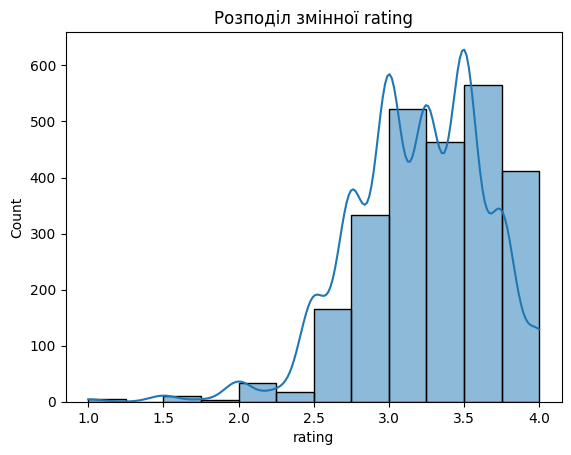

In [13]:
sns.histplot(df['rating'], kde=True,bins=12)
plt.title('Розподіл змінної rating')
plt.show()


In [14]:
df.cocoa_percent.nunique()

46

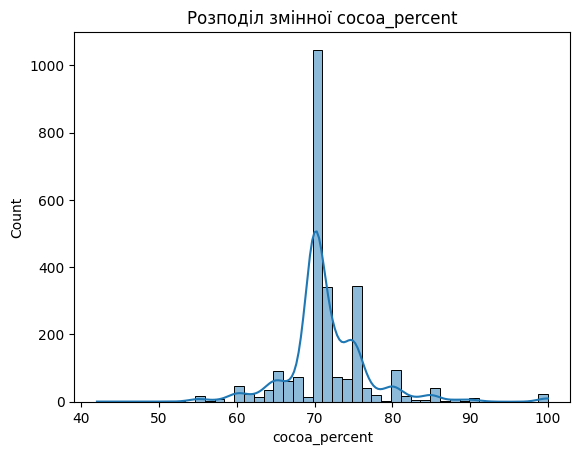

In [15]:
sns.histplot(df['cocoa_percent'], kde=True, bins=46)
plt.title('Розподіл змінної cocoa_percent')
plt.show()



In [16]:
df.num_ingredients.nunique()

6

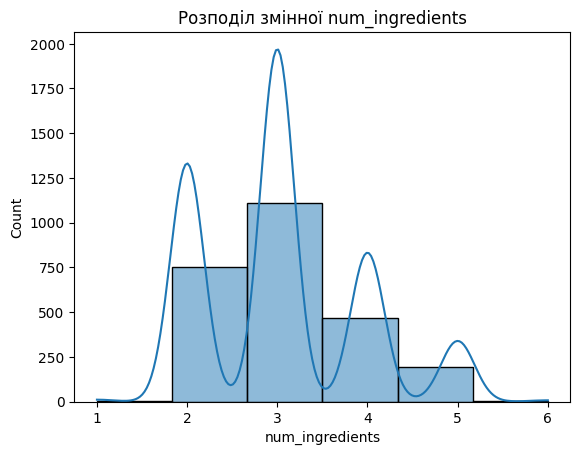

In [17]:
sns.histplot(df['num_ingredients'], kde=True, bins=6)
plt.title('Розподіл змінної num_ingredients')
plt.show()

In [18]:
missing_data = df['rating'].isnull().sum()
print(f"Кількість пропущених значень у 'rating': {missing_data}")




Кількість пропущених значень у 'rating': 0


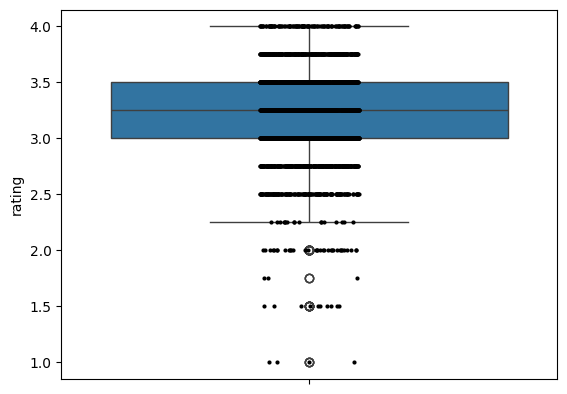

In [19]:
sns.boxplot(data=df, y='rating')
sns.stripplot( y='rating', data=df, color='black', size=3, jitter=True)
plt.show()

In [20]:
df['rating'].value_counts()


rating
3.50    565
3.00    523
3.25    464
2.75    333
3.75    300
2.50    166
4.00    112
2.00     33
2.25     17
1.50     10
1.00      4
1.75      3
Name: count, dtype: int64

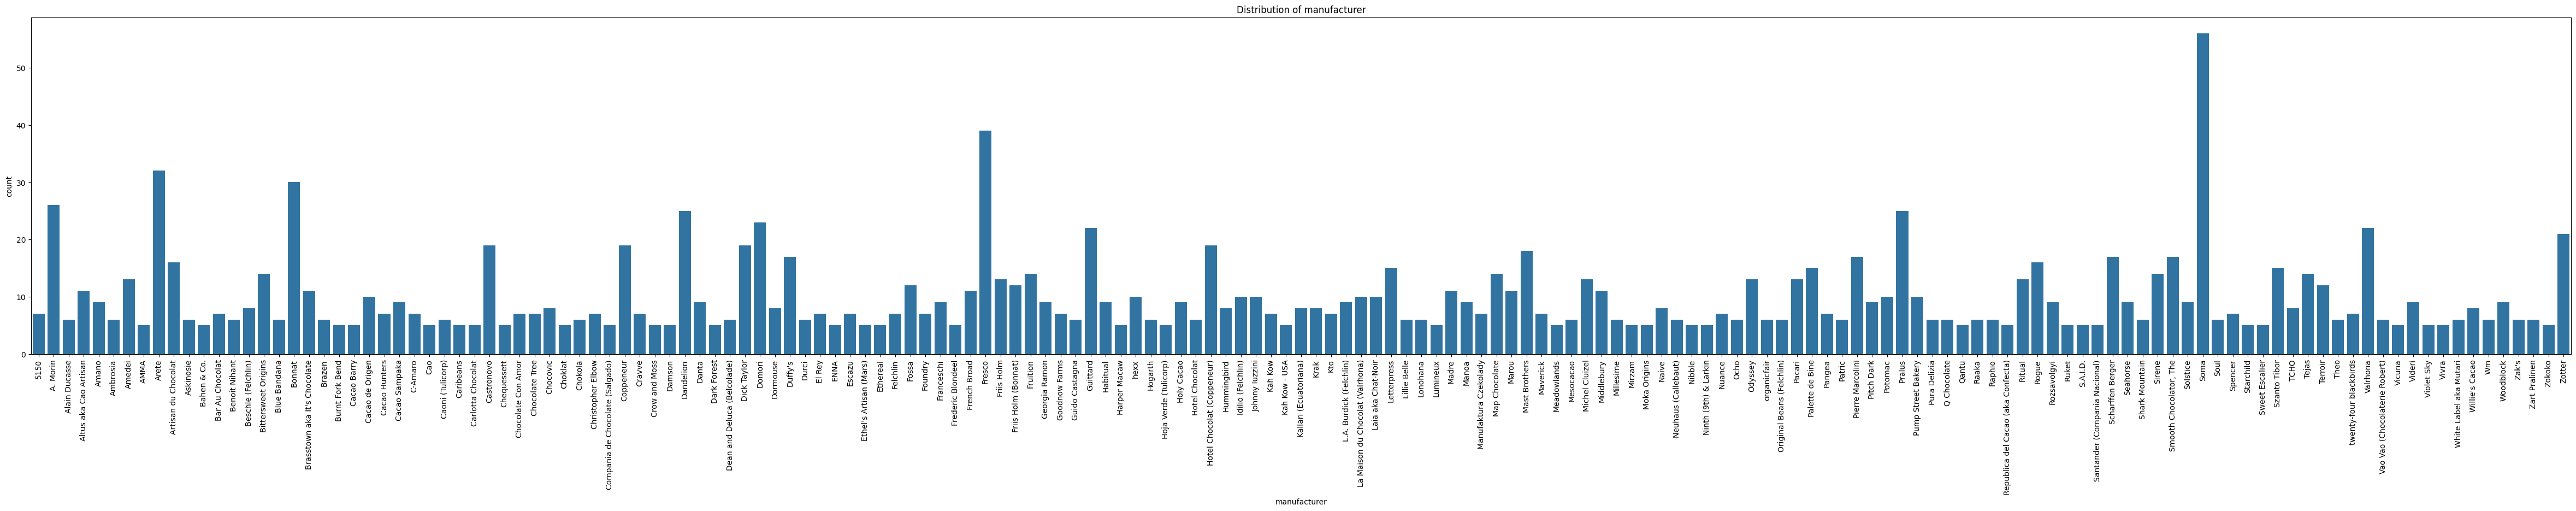

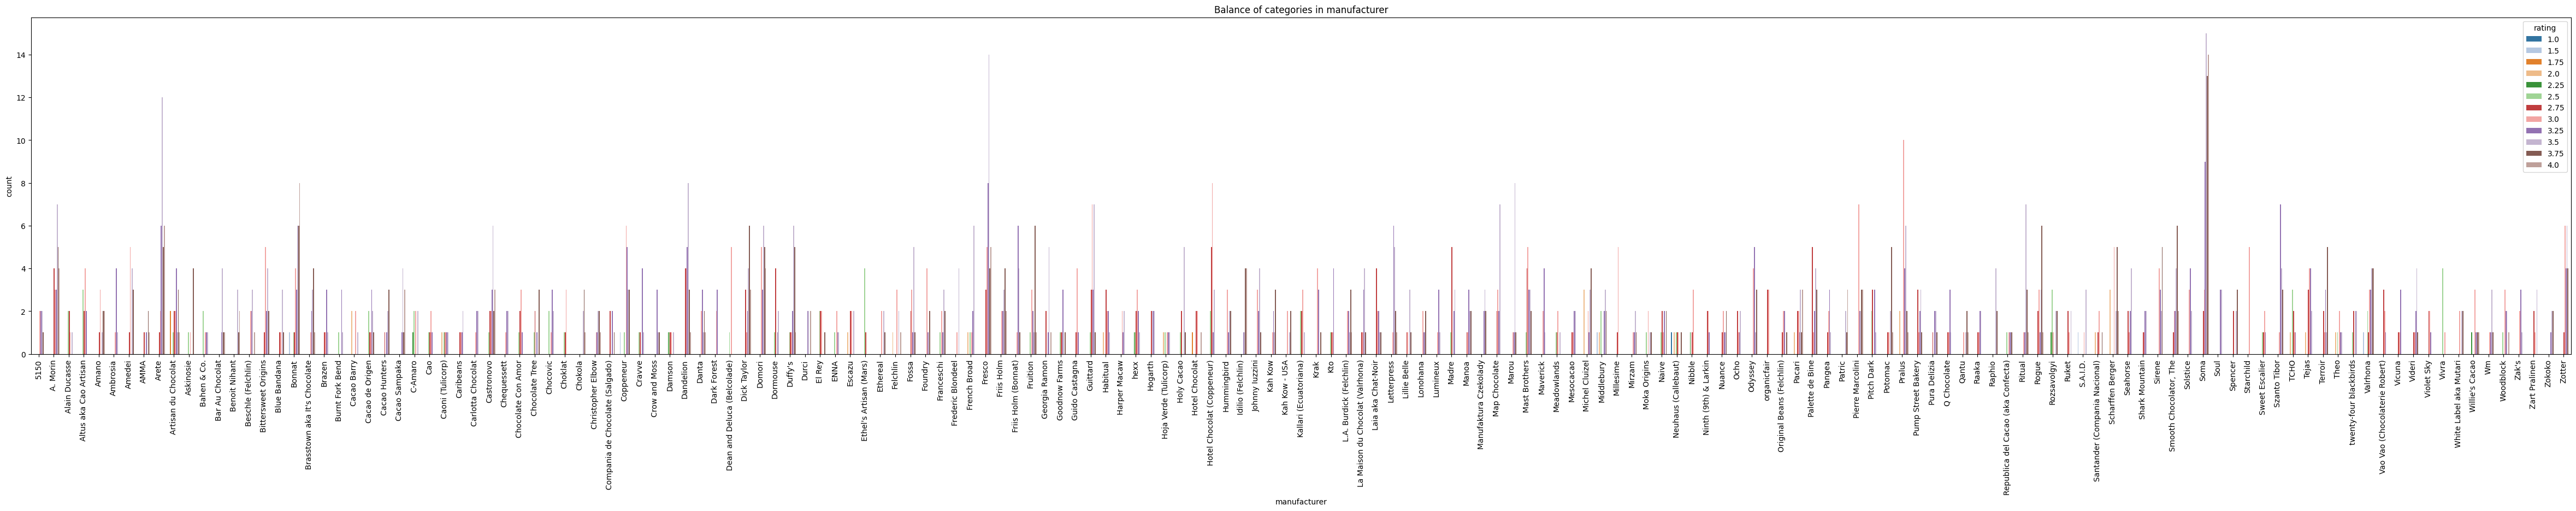

Кількість пропущених даних: 0


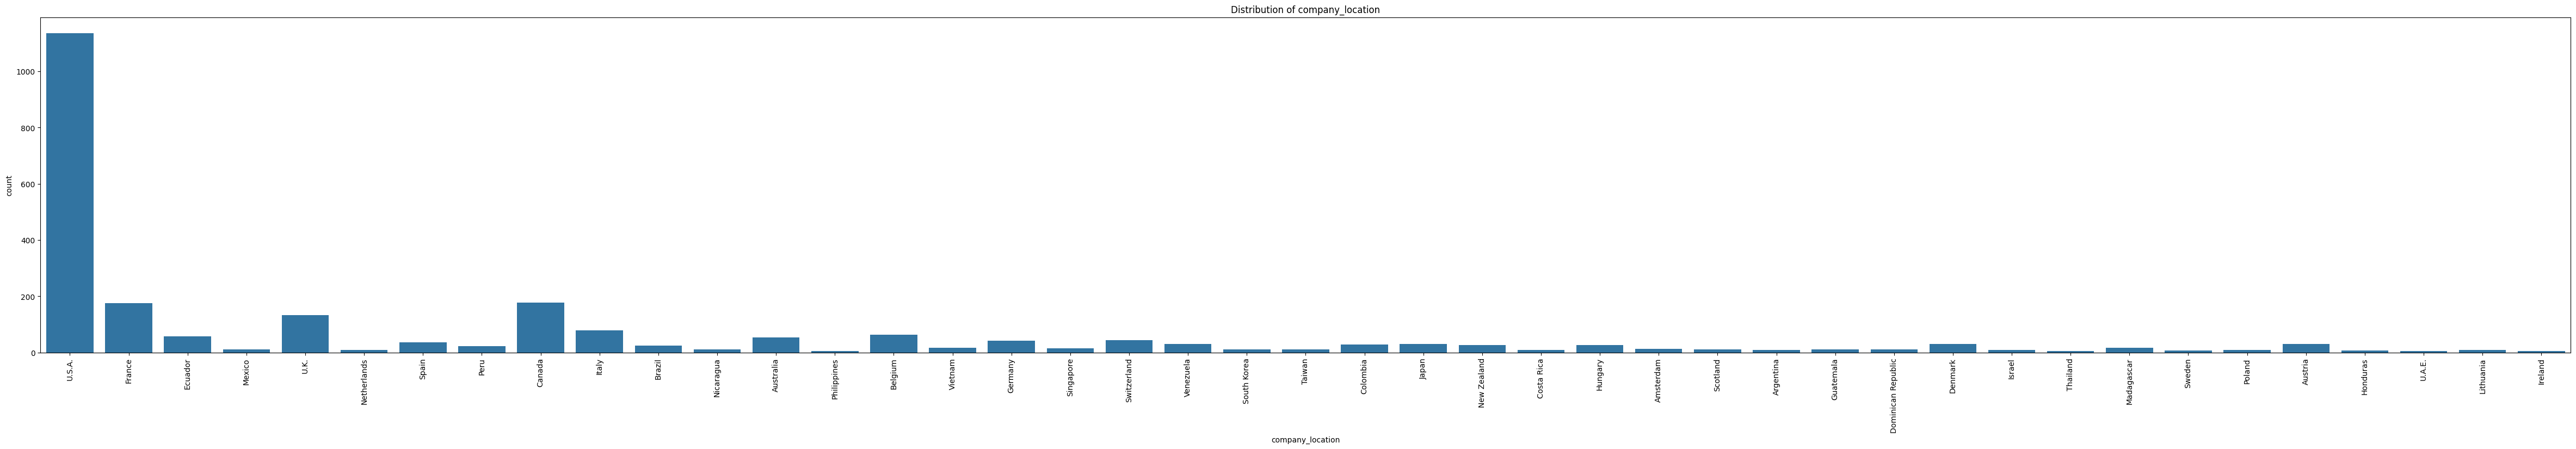

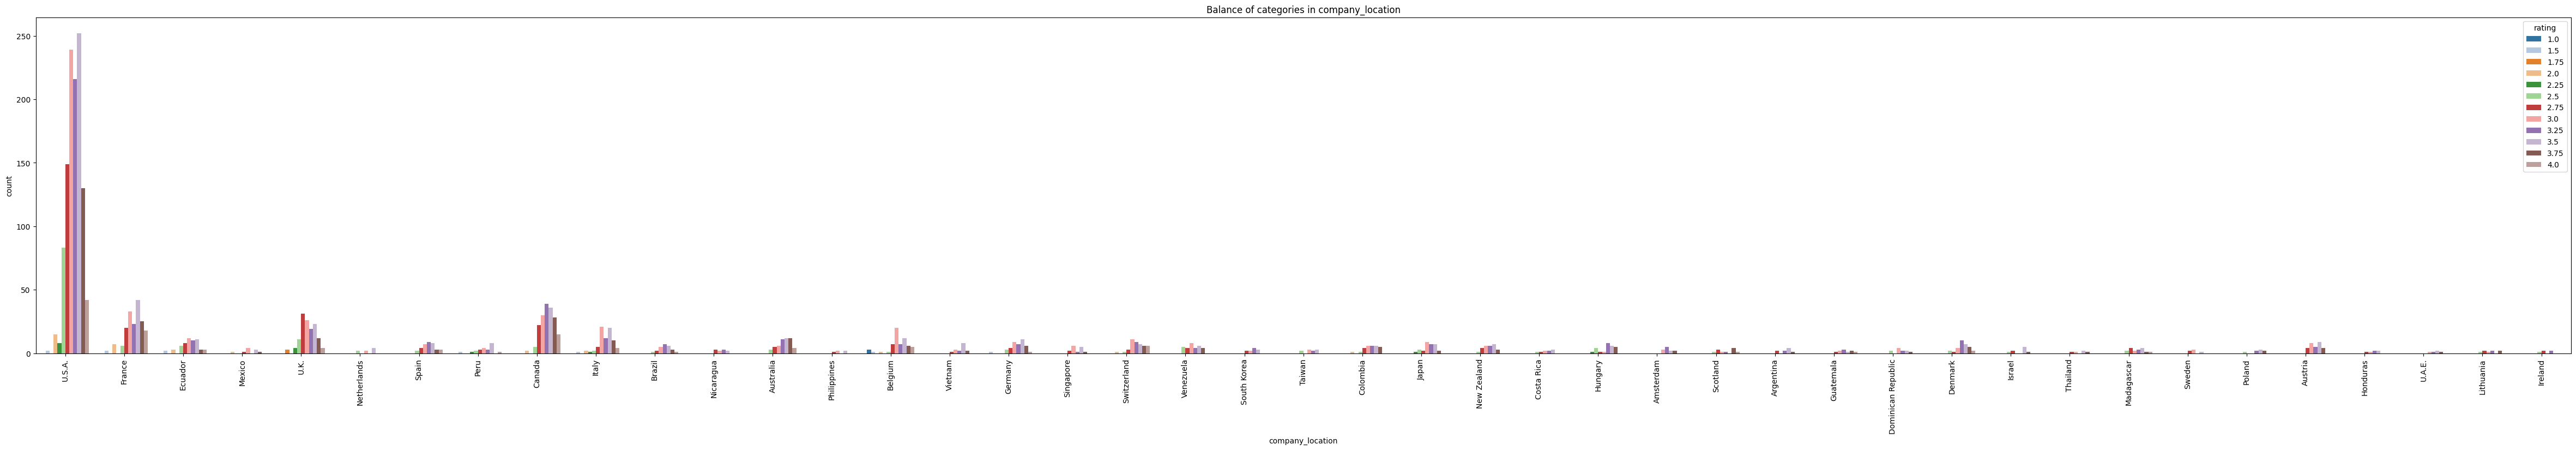

Кількість пропущених даних: 0


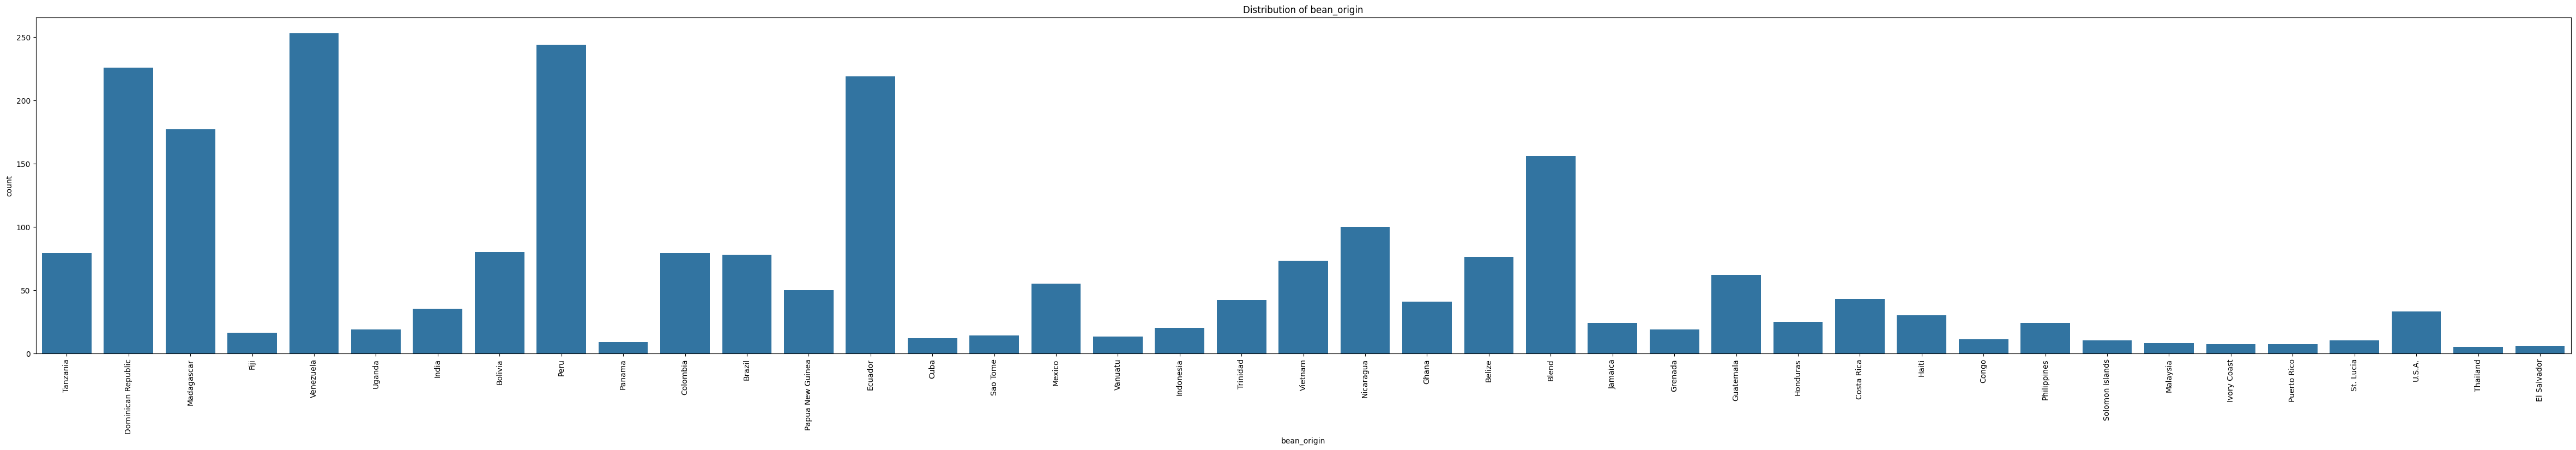

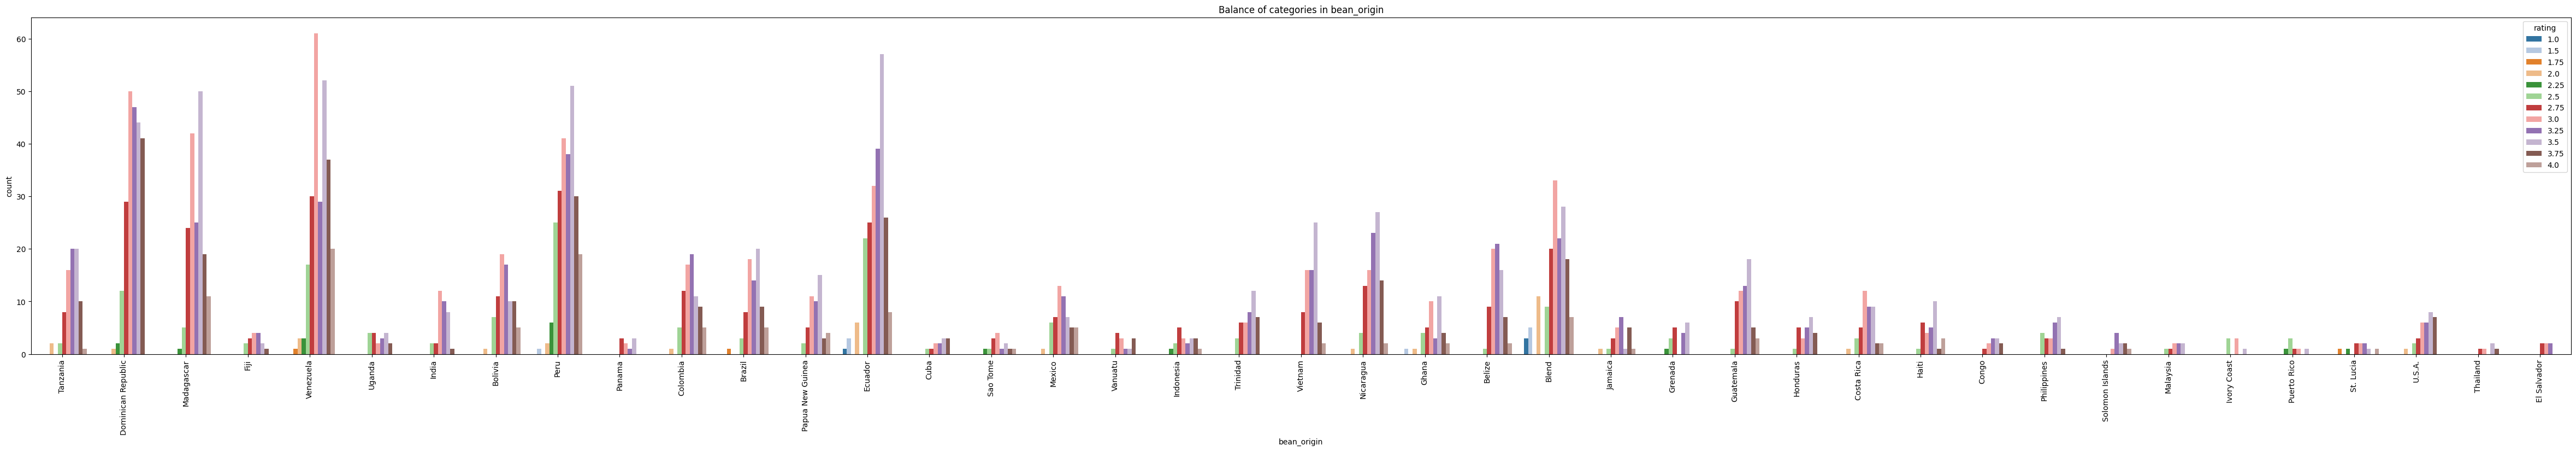

Кількість пропущених даних: 0


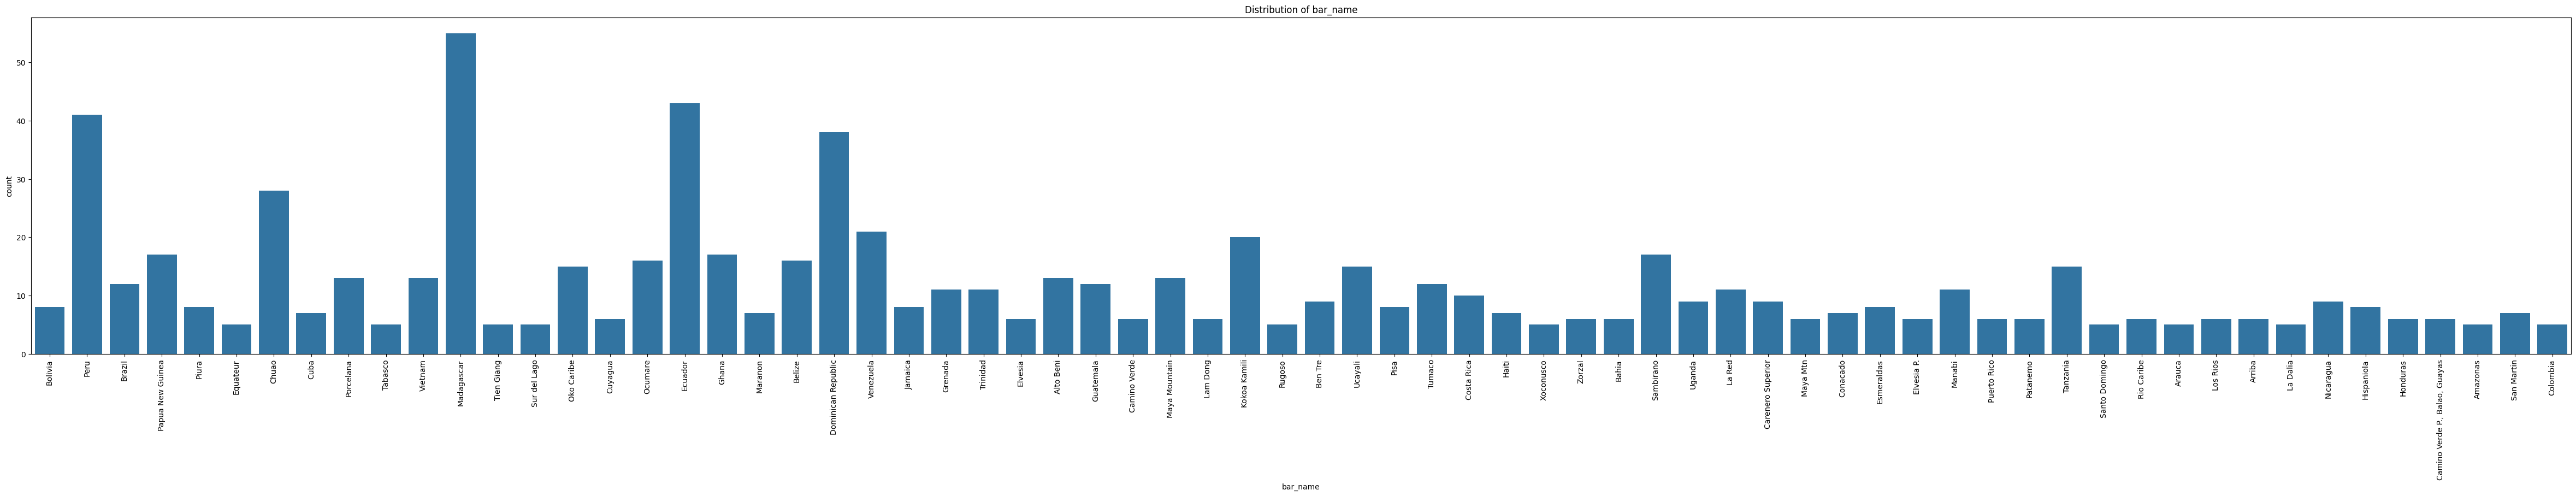

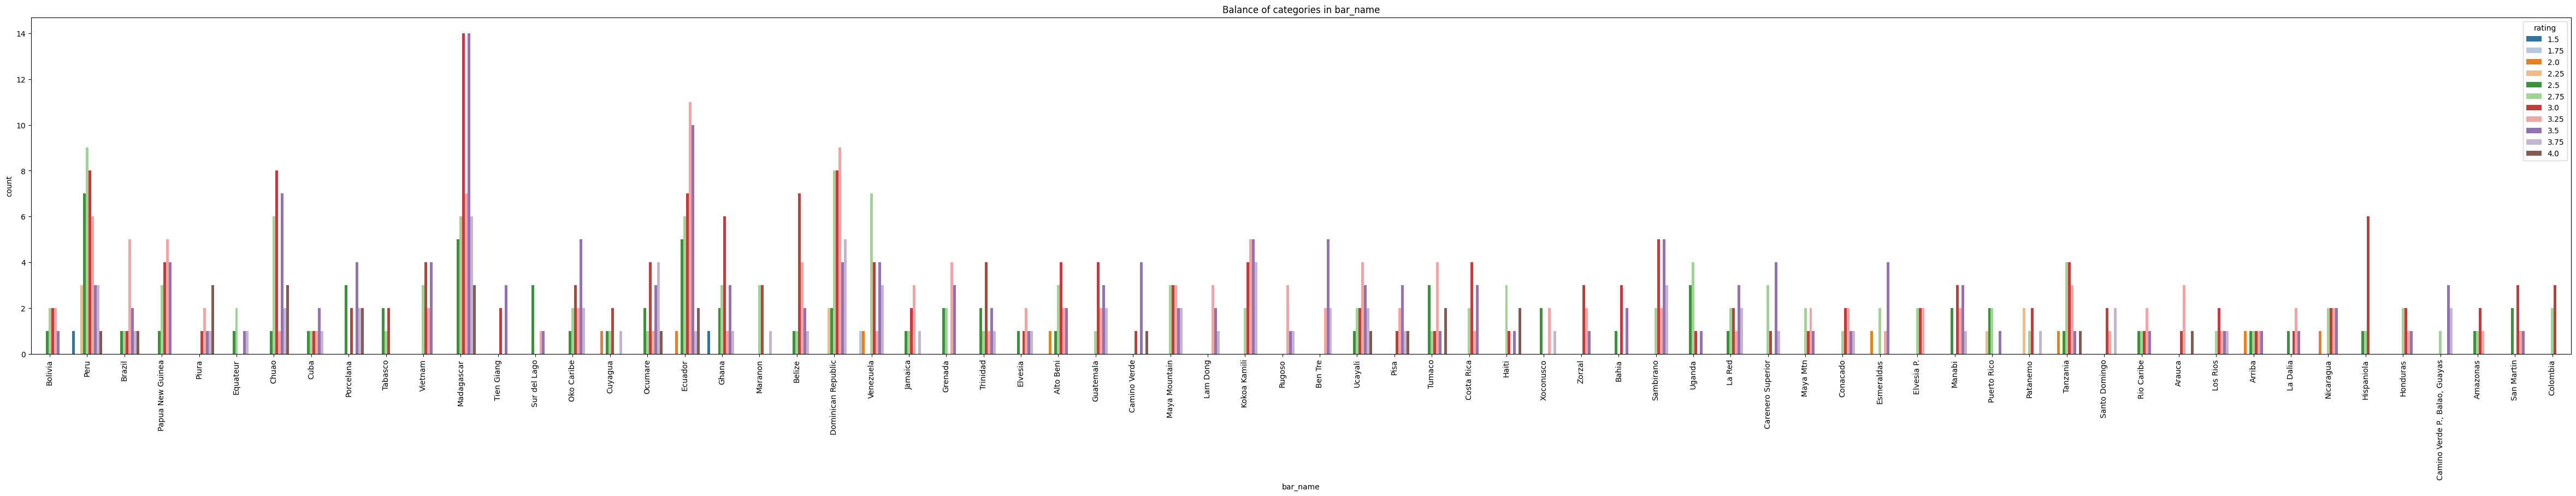

Кількість пропущених даних: 0


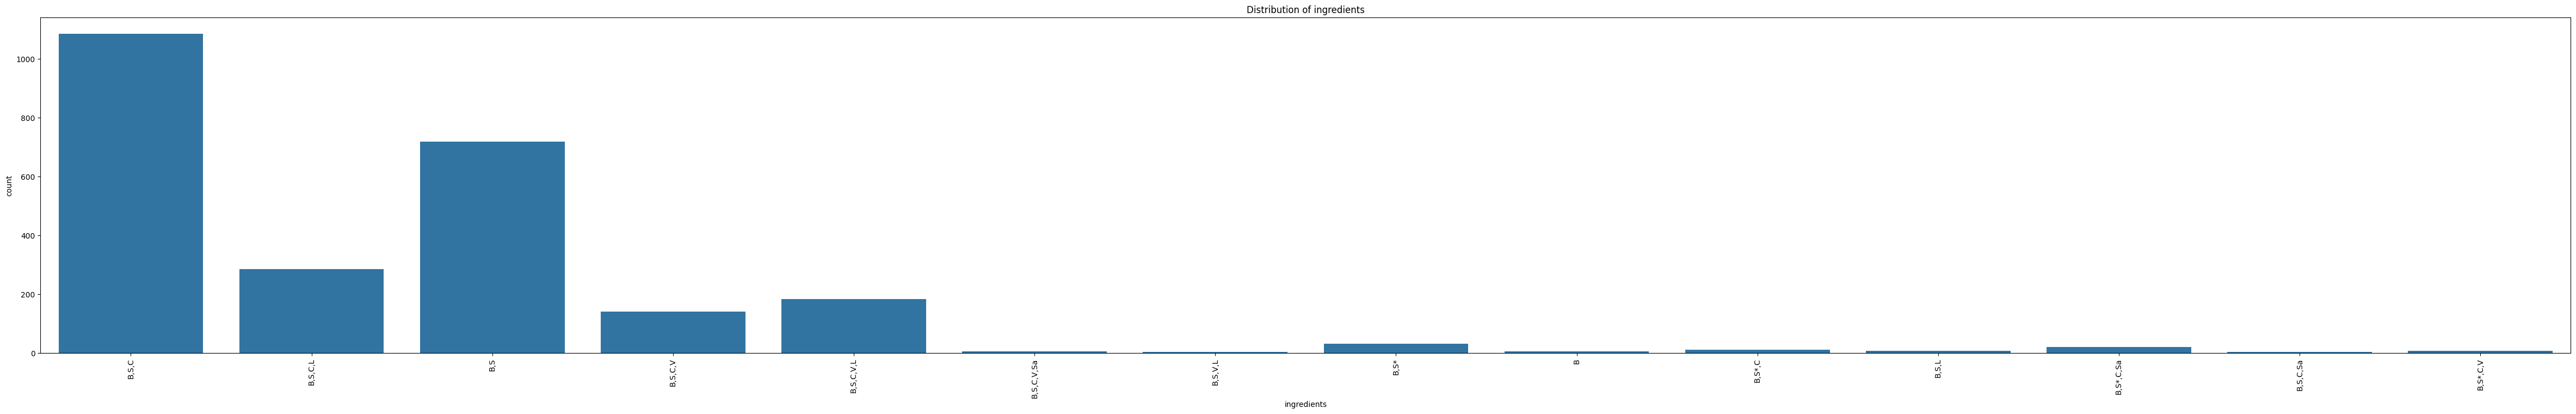

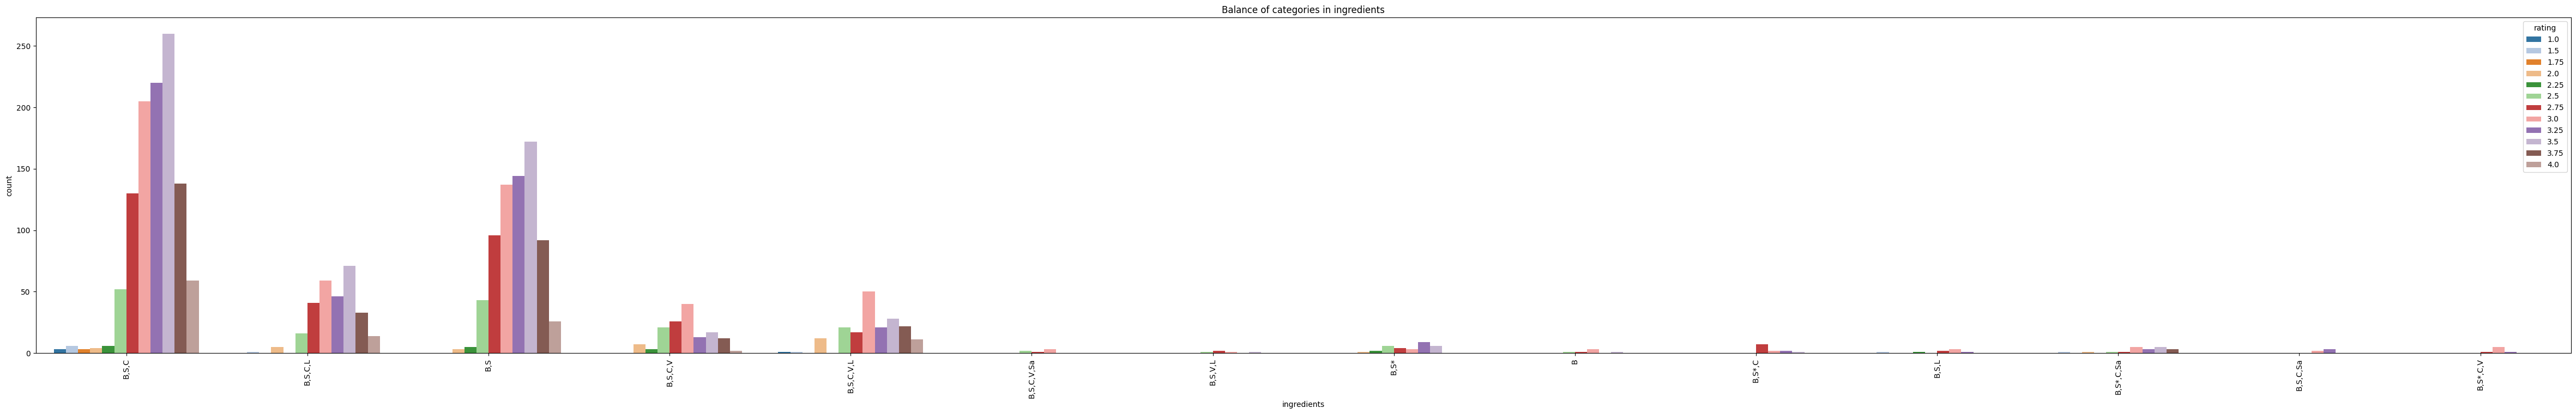

Кількість пропущених даних: 0


In [21]:
categorical_columns = df.select_dtypes(include='object').drop(columns='review')
# Розподіл категорій
for col in categorical_columns:
    counts = df[col].value_counts()
    included_values = counts[counts >= 5].index
    filtered_df = df[df[col].isin(included_values)]
    plt.figure(figsize=(60, 8))
    # Оцінка розподілу категорій у категоріальній змінній
    sns.countplot(x=col, data=filtered_df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation = 90)
    plt.show()

    plt.figure(figsize=(60, 8))
    # Оцінка балансу категорій у категоріальній змінній
    sns.countplot(x=col, hue='rating', data=filtered_df, palette='tab20')
    plt.title(f"Balance of categories in {col}")

    plt.xticks(rotation = 90)
    plt.show()
    # Кількість пропущених даних
    missing_data_count = df[col].isnull().sum()
    print(f"Кількість пропущених даних: {missing_data_count}")

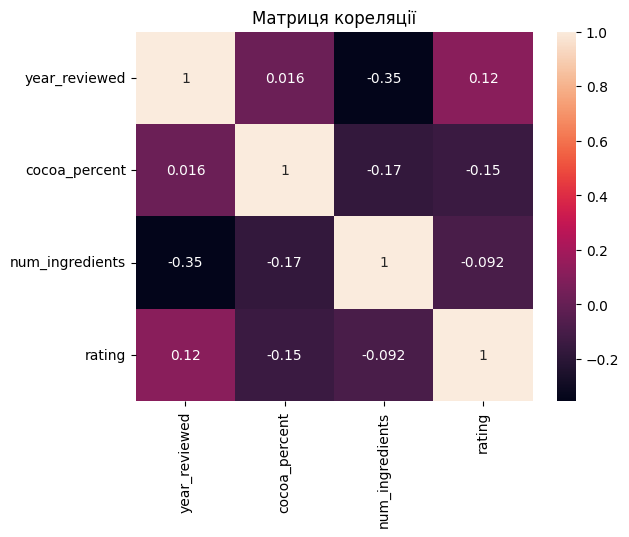

In [22]:
sns.heatmap(numeric_data.corr(),annot=True)
plt.title('Матриця кореляції')
plt.show()

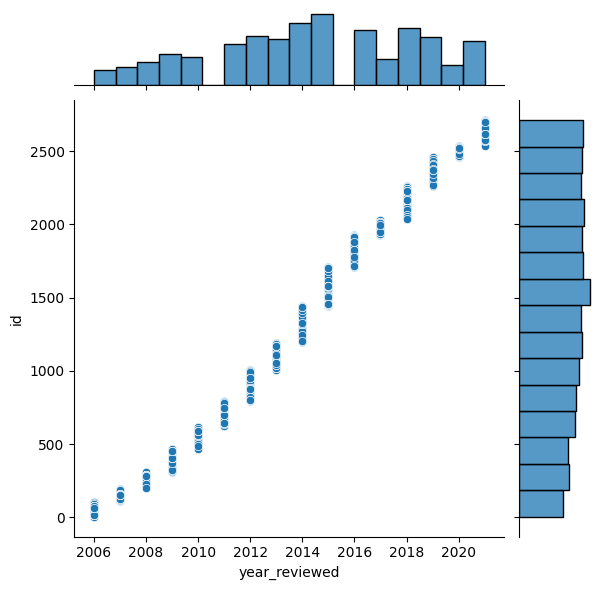

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(x='year_reviewed', y='id', data=df)
plt.show()


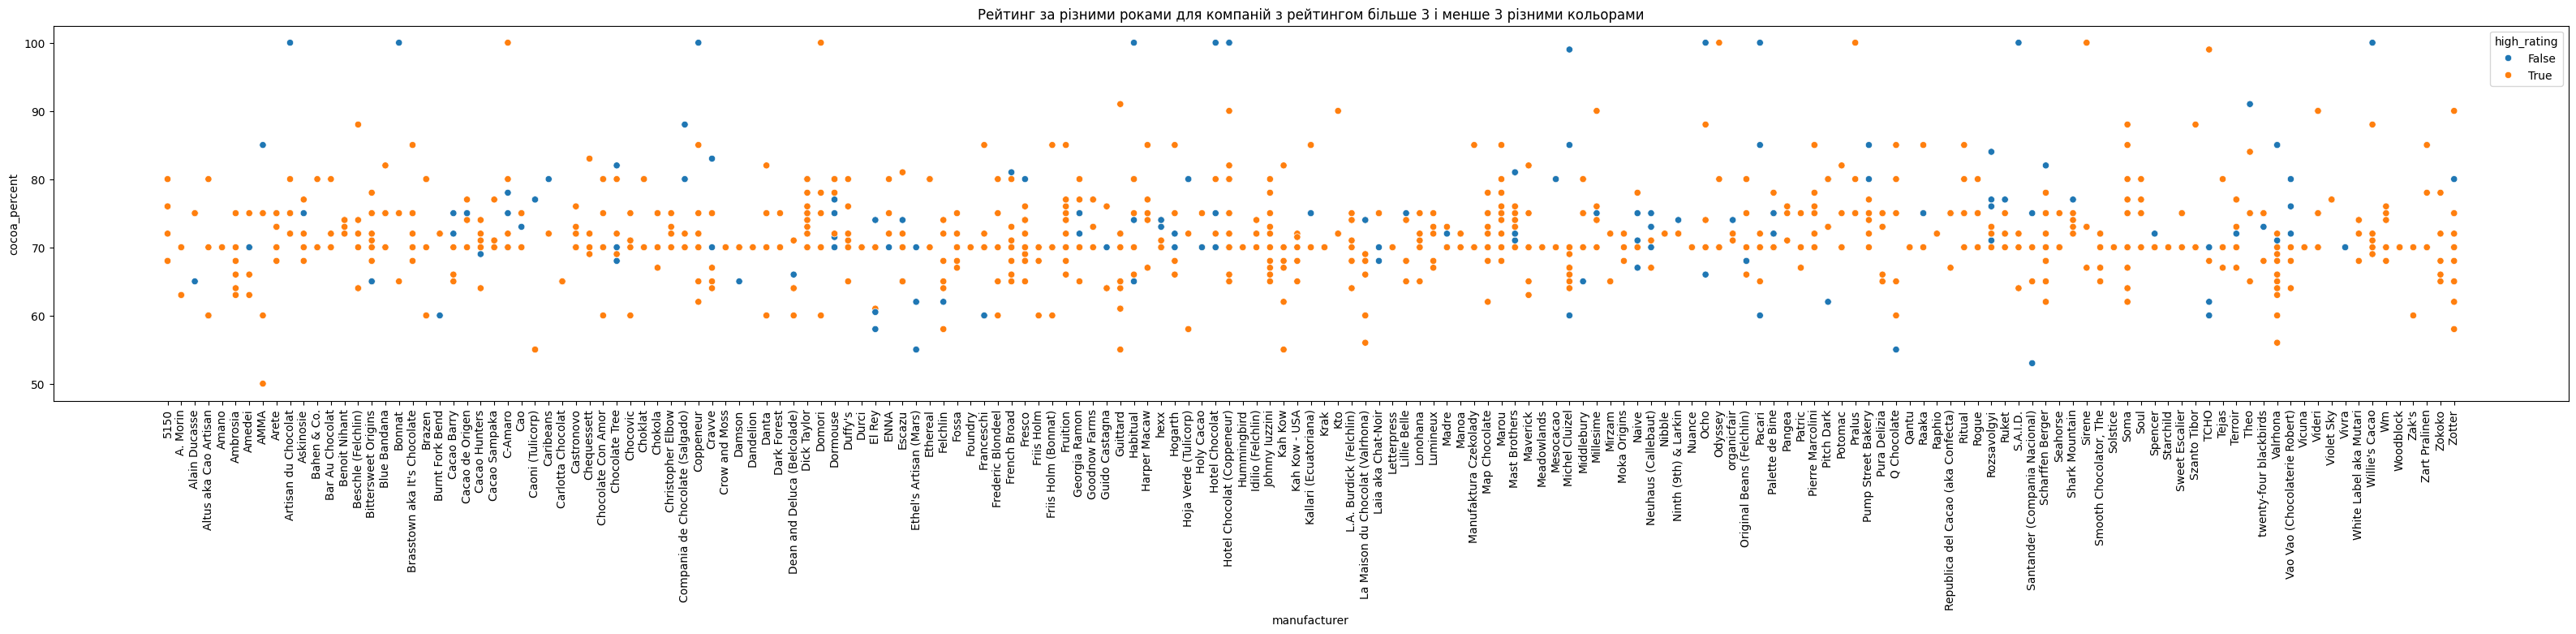

In [24]:
filtered_df = df.groupby('manufacturer').filter(lambda x: len(x) >= 5)
# Додавання стовпця 'high_rating'
filtered_df['high_rating'] = filtered_df['rating'] >= 3
plt.figure(figsize=(40, 6))
sns.scatterplot(data=filtered_df, x='manufacturer', y='cocoa_percent', hue='high_rating')
plt.title('Рейтинг за різними роками для компаній з рейтингом більше 3 і менше 3 різними кольорами')
plt.xticks(rotation=90)
plt.show()

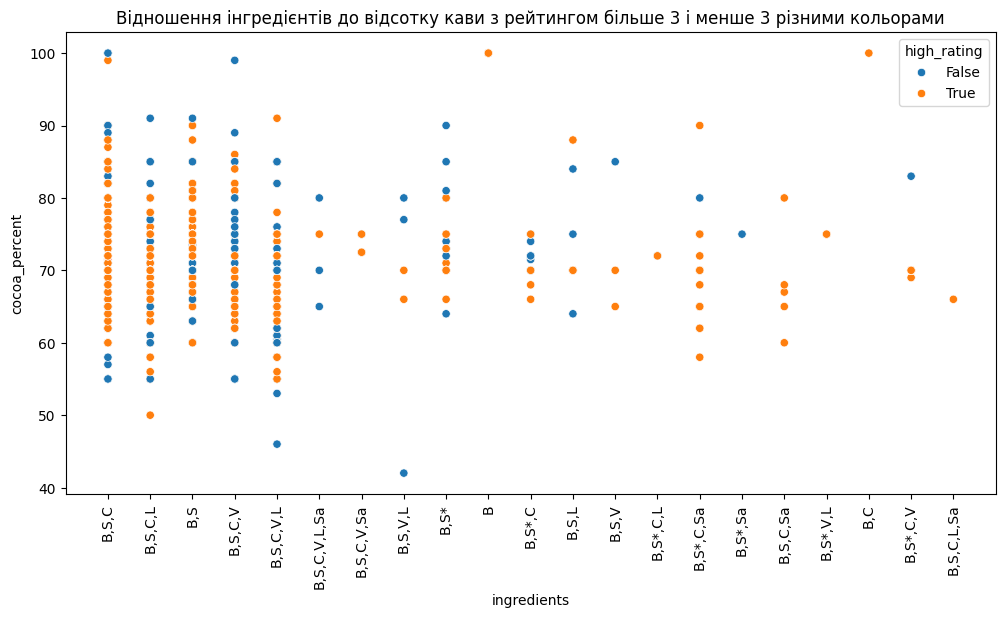

In [25]:
dff=df.copy()
dff['high_rating']=dff["rating"]>=3
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dff, x='ingredients', y='cocoa_percent', hue='high_rating')
plt.title('Відношення інгредієнтів до відсотку кави з рейтингом більше 3 і менше 3 різними кольорами')
plt.xticks(rotation=90)
plt.show()

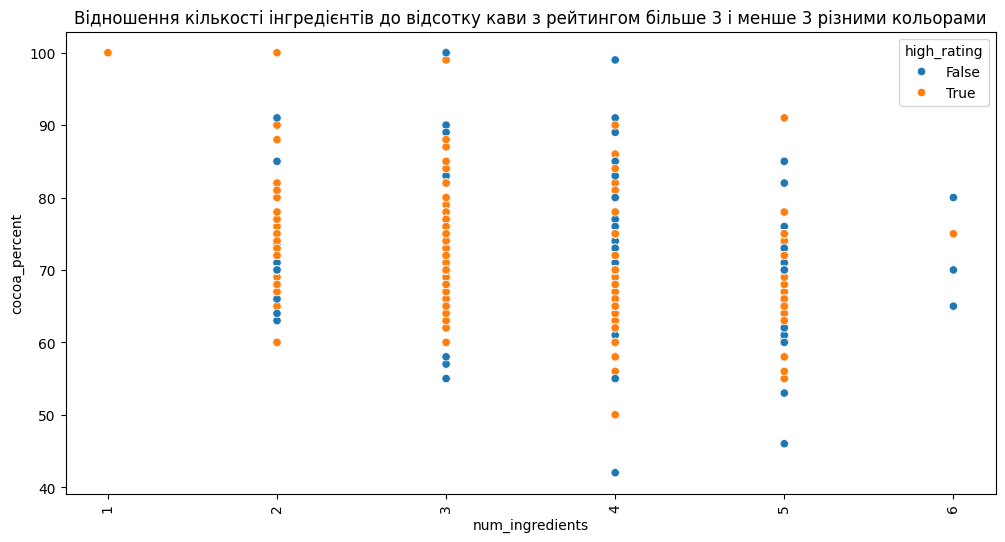

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dff, x='num_ingredients', y='cocoa_percent', hue='high_rating')
plt.title('Відношення кількості інгредієнтів до відсотку кави з рейтингом більше 3 і менше 3 різними кольорами')
plt.xticks(rotation=90)
plt.show()

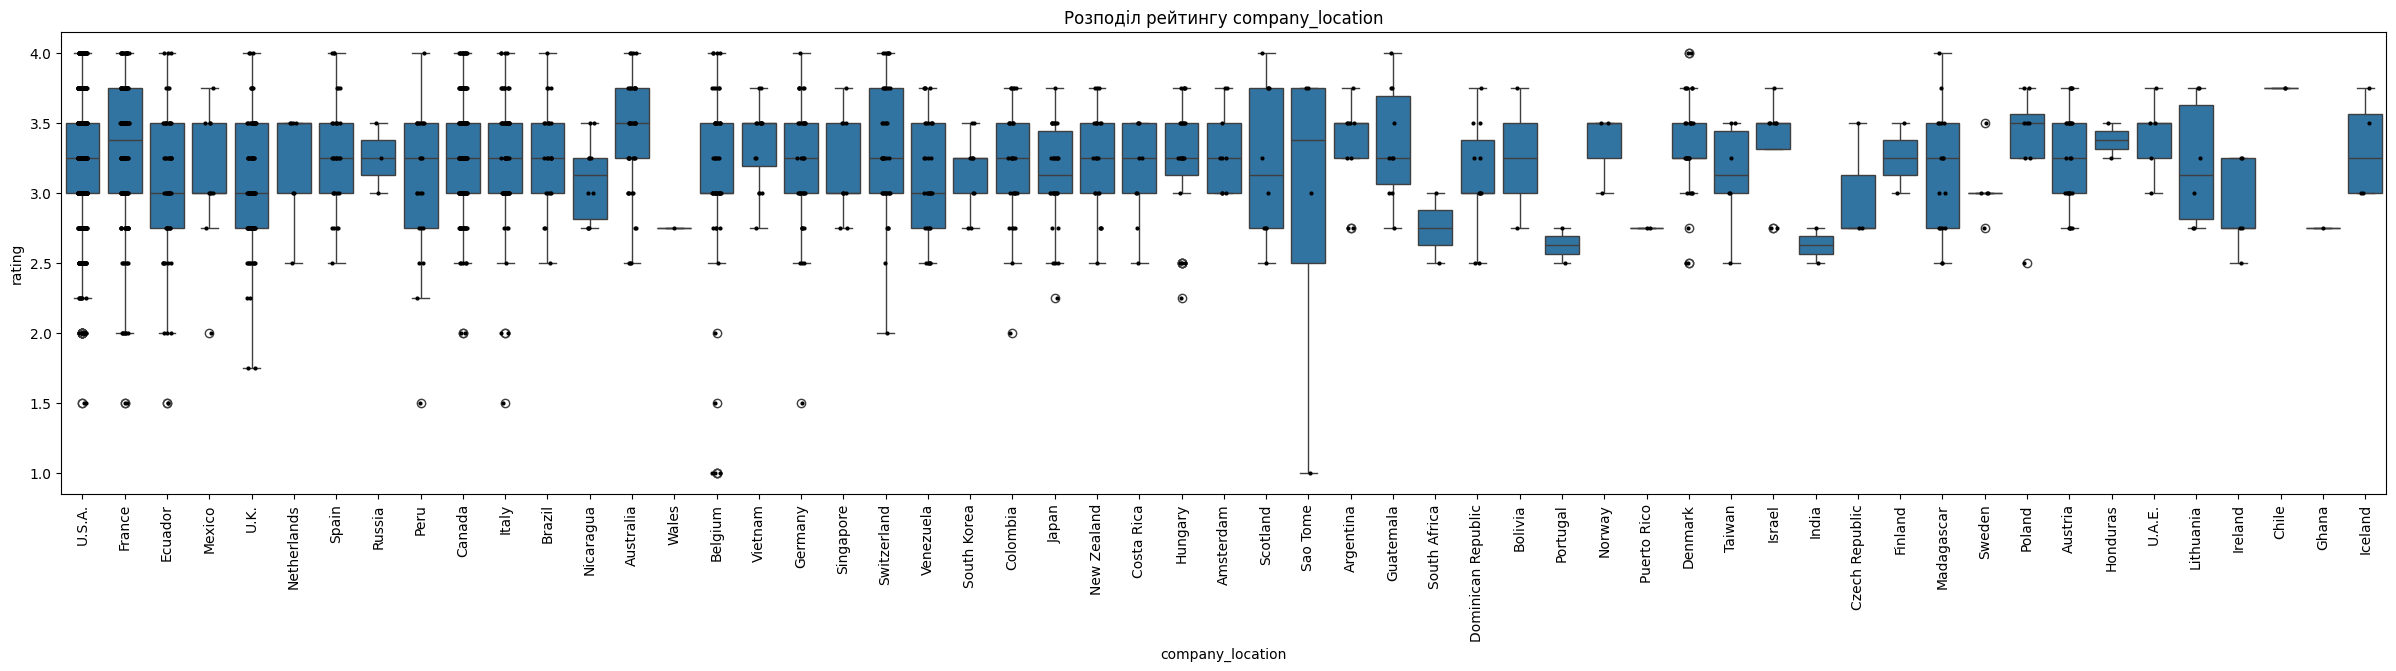

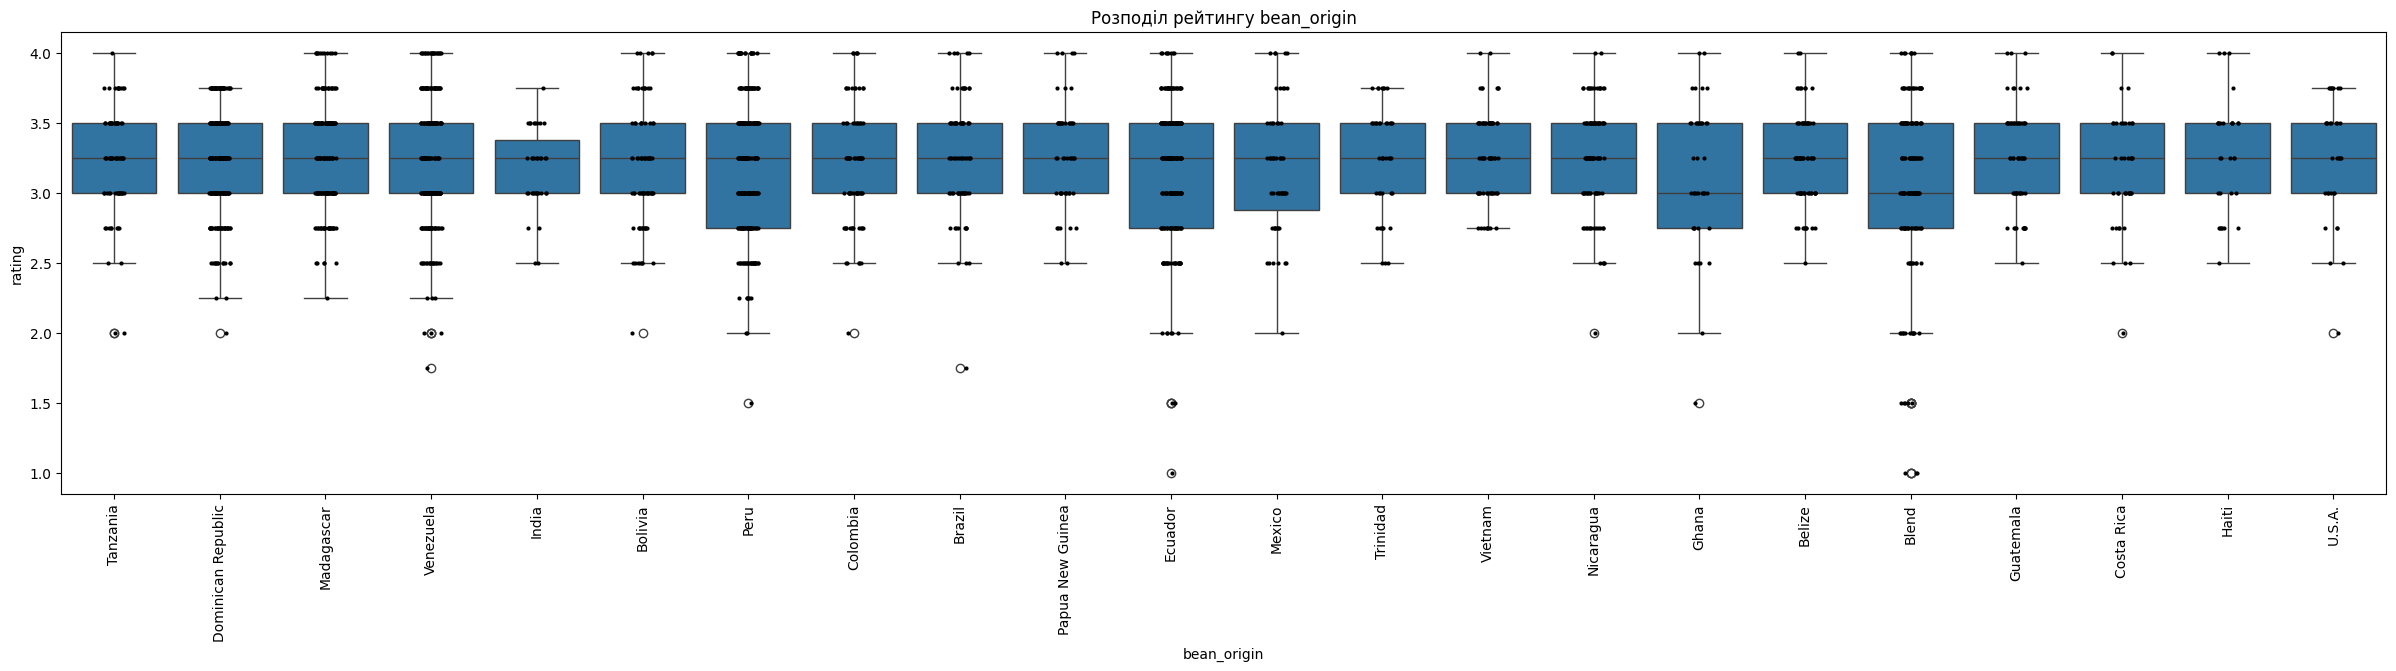

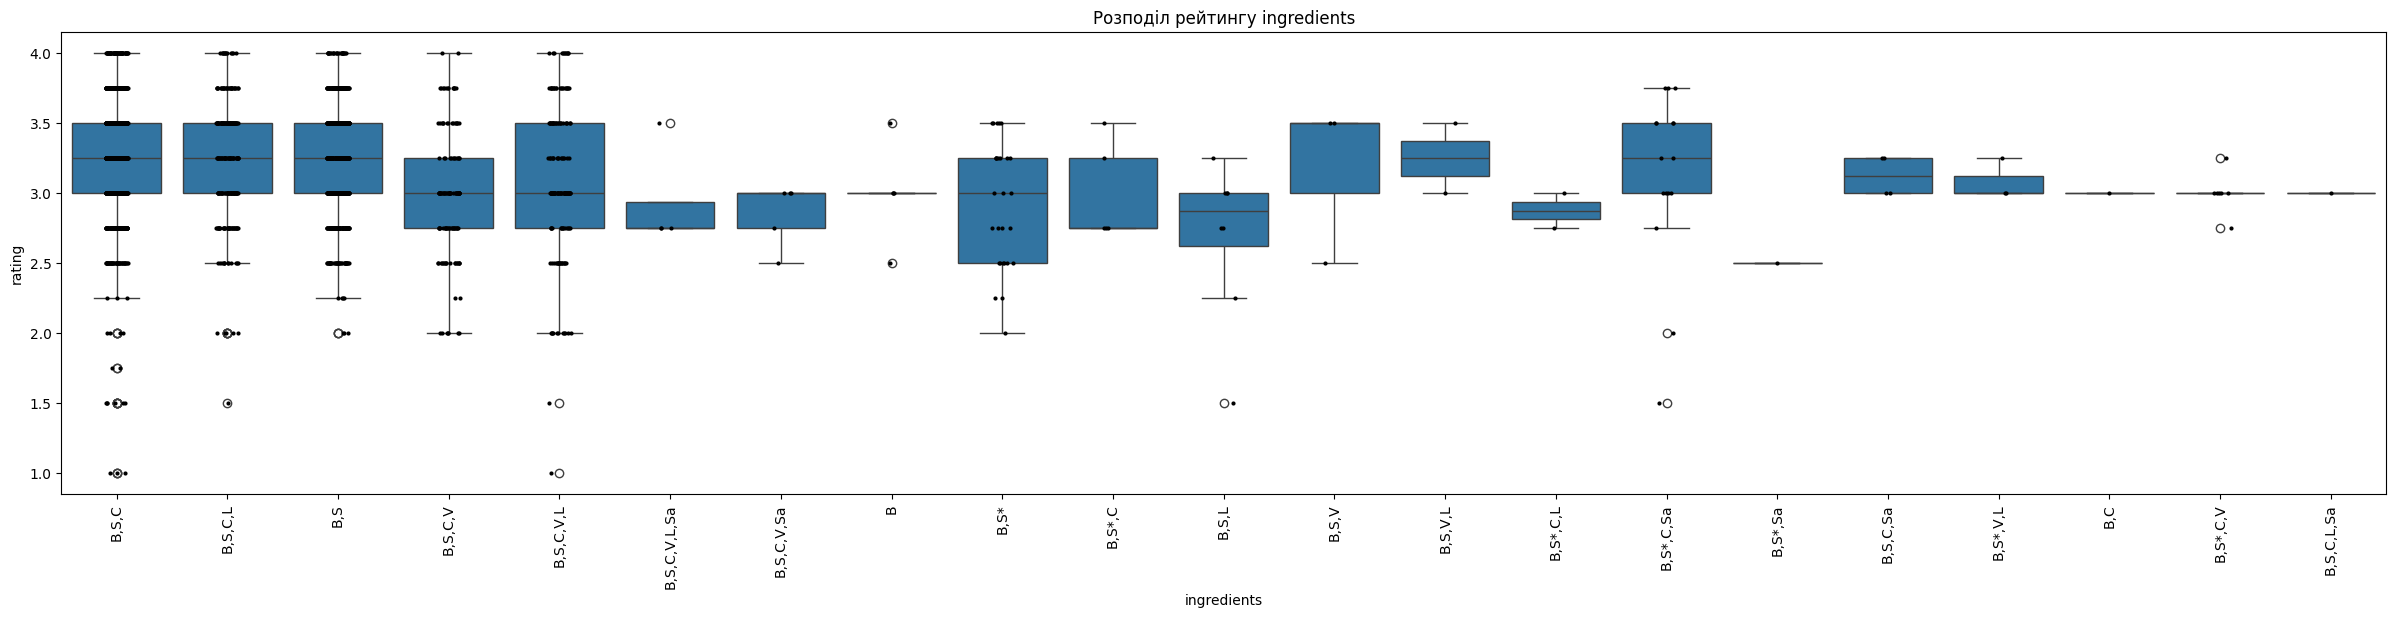

In [27]:
categorical = df.select_dtypes(include='object').drop(columns=['review',"manufacturer","bar_name"])
# Оцінка розподілу та виявлення статистичних викидів
for col in categorical:
    filtered_df = df.groupby('bean_origin').filter(lambda x: len(x) >= 30)
    plt.figure(figsize=(30, 6))
    sns.boxplot(x=col, y='rating', data=filtered_df)
    sns.stripplot(x=col, y='rating', data=filtered_df, color='black', size=3, jitter=True)
    plt.xticks(rotation=90)
    plt.title(f'Розподіл рейтингу {col}')
    plt.show()



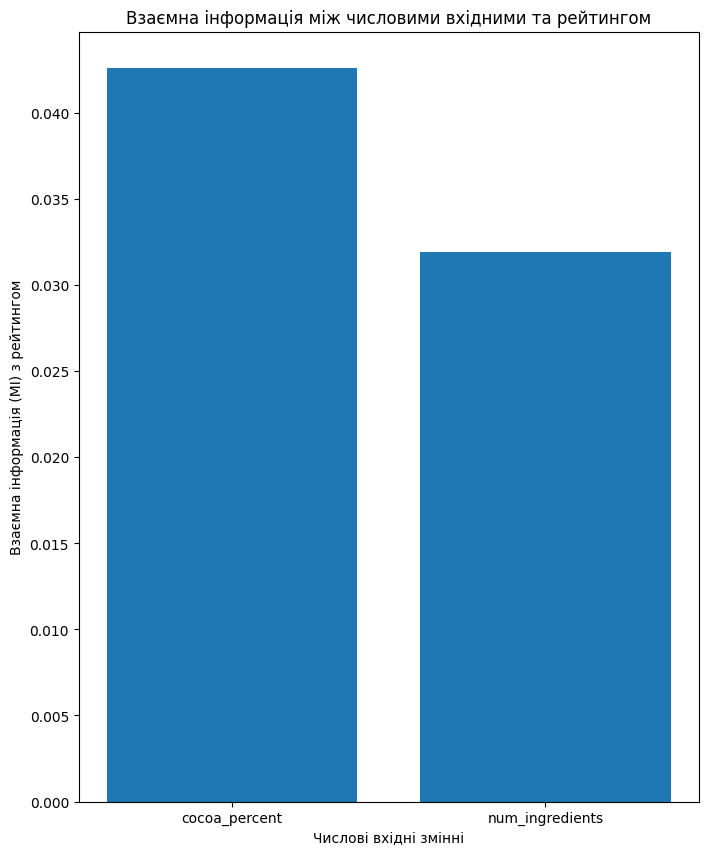

In [28]:
from sklearn.feature_selection import mutual_info_regression
# Обчислення взаємної інформації
mi_cocoa_percent = mutual_info_regression(df[['cocoa_percent']], df['rating'])[0]
mi_num_ingredients = mutual_info_regression(df[['num_ingredients']], df['rating'])[0]

# Створення barplot
plt.figure(figsize=(8, 10))
plt.bar(['cocoa_percent', 'num_ingredients'], [mi_cocoa_percent, mi_num_ingredients])
plt.xlabel('Числові вхідні змінні')
plt.ylabel('Взаємна інформація (MI) з рейтингом')
plt.title('Взаємна інформація між числовими вхідними та рейтингом')
plt.show()

In [29]:
from scipy.stats import skew
skewness = skew(df['cocoa_percent'])
print(f'Skewness of cocoa_percent: {skewness}')

Skewness of cocoa_percent: 1.1982965619063584


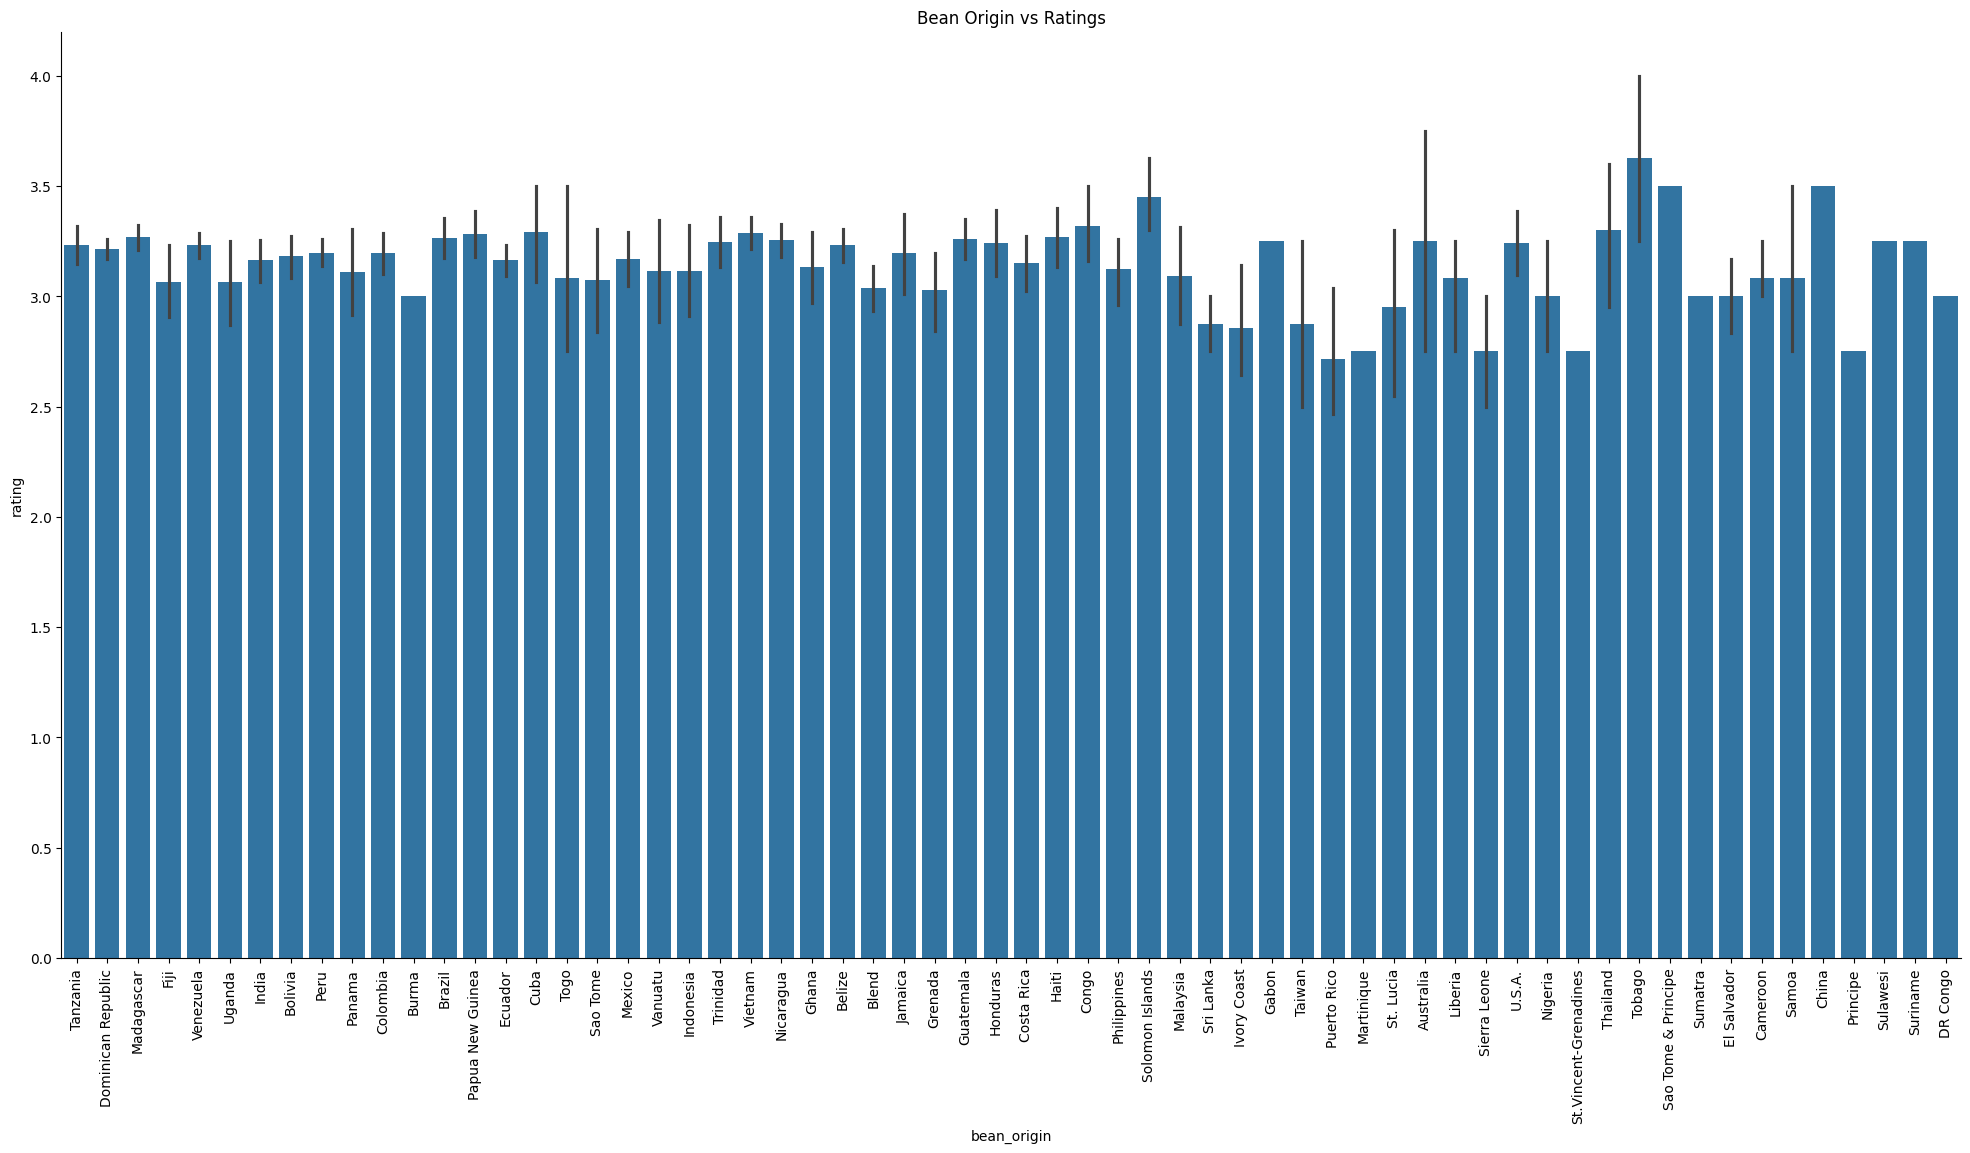

In [30]:
sns.catplot(x = 'bean_origin',y = 'rating',kind = "bar",height = 10,aspect = 2,data = df)

plt.xticks(rotation = 90)
plt.title('Bean Origin vs Ratings')
plt.show()

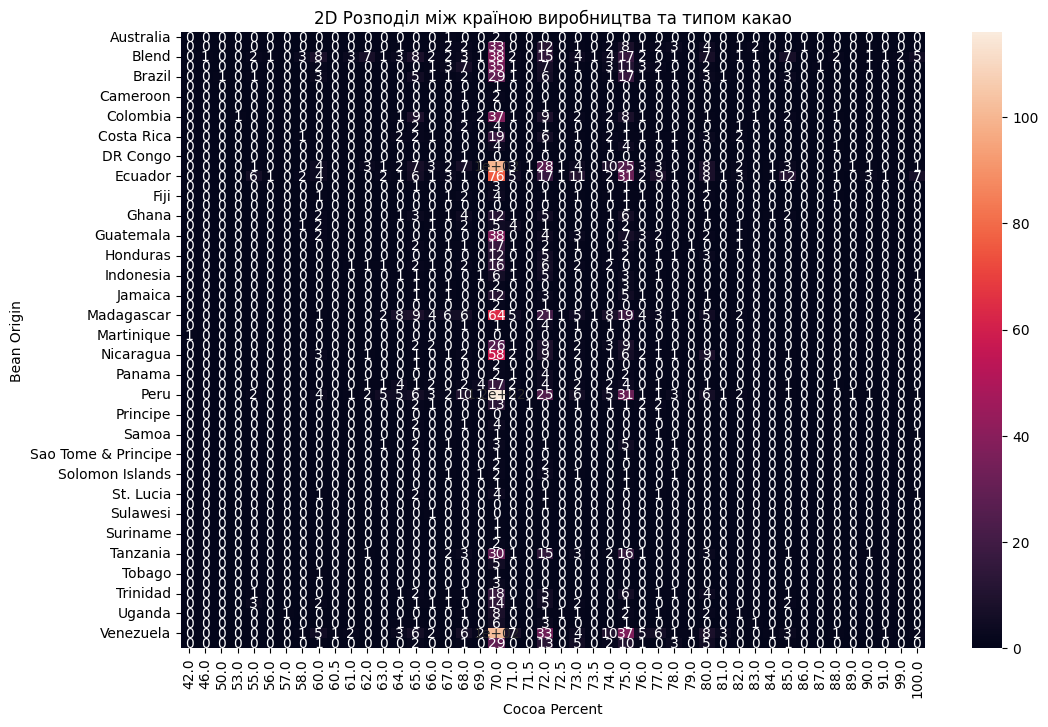

χ² статистика: 4823.732863832489
P-значення: 6.381682169349899e-118
Ступені свободи: 2745


In [31]:
import scipy.stats as stats
# Вибірка для χ² тесту
country_cocoa_type_table = pd.crosstab(index=df['bean_origin'], columns=df['cocoa_percent'])

# Побудова 2D розподілу
plt.figure(figsize=(12, 8))
sns.heatmap(country_cocoa_type_table, annot=True)
plt.title('2D Розподіл між країною виробництва та типом какао')
plt.xlabel('Cocoa Percent')
plt.ylabel('Bean Origin')
plt.show()

chi2_stat, p_val, dof, ex = stats.chi2_contingency(country_cocoa_type_table)

# Виведення результатів
print(f"χ² статистика: {chi2_stat}")
print(f"P-значення: {p_val}")
print(f"Ступені свободи: {dof}")

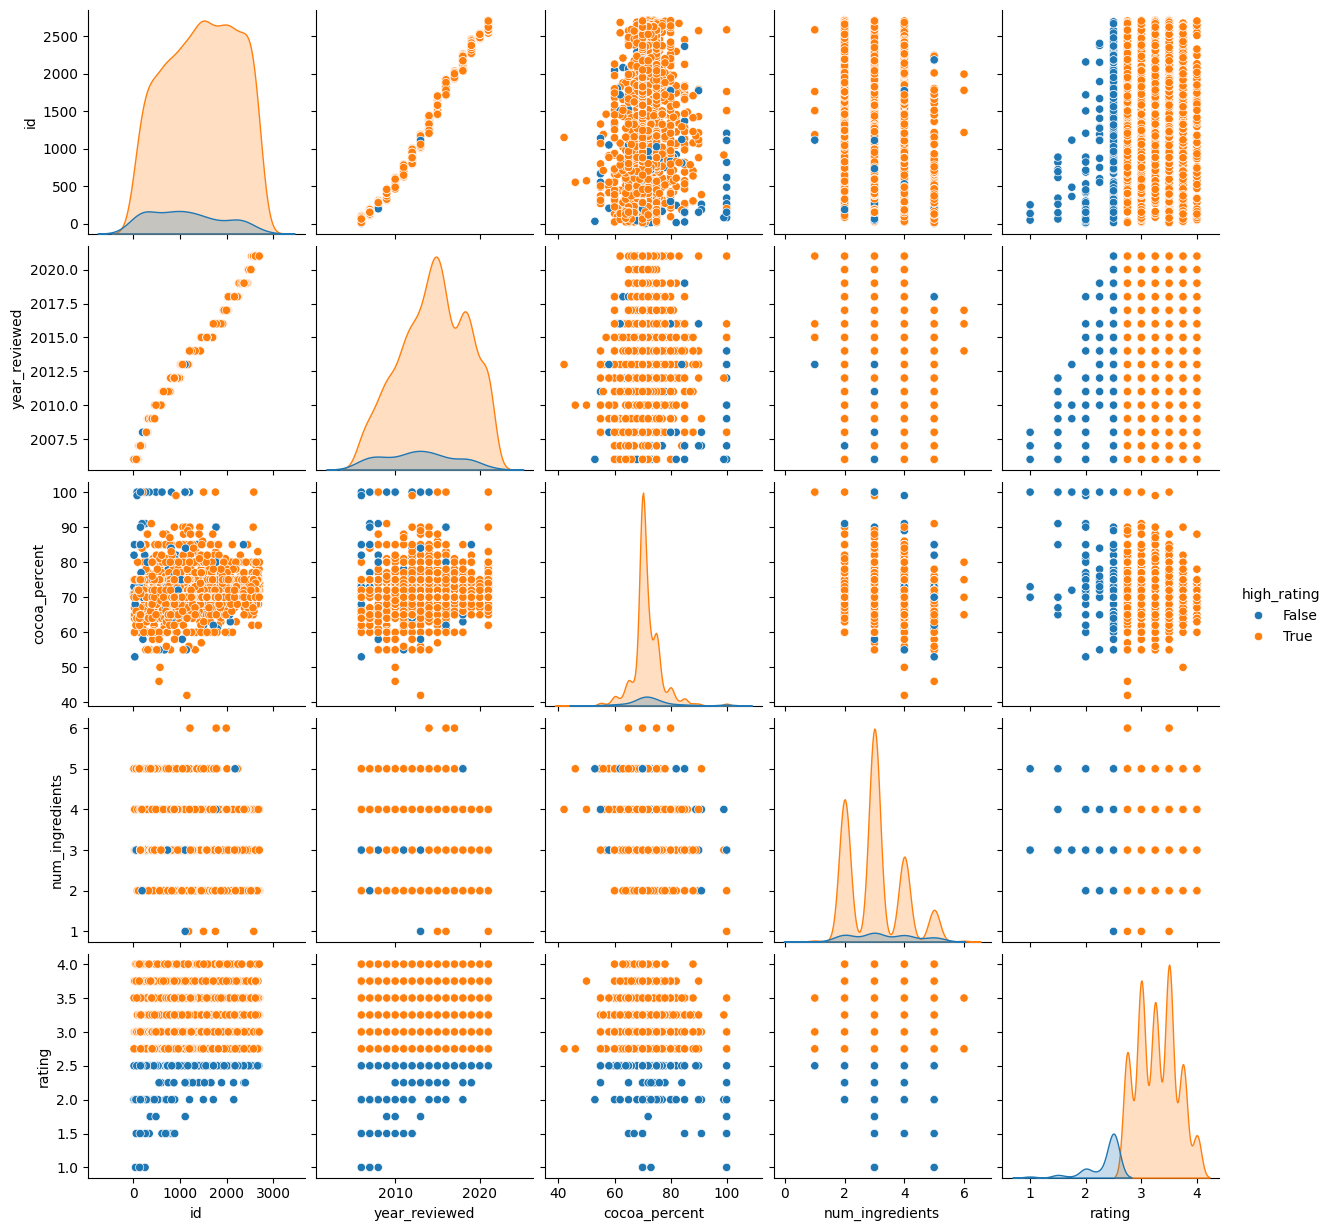

In [32]:
dff['high_rating'] = dff['rating'] > 2.5
sns.pairplot(dff, hue='high_rating')


Статистика=34.37693796984425, p-значення=2.0030164990940435e-06
Відхиляємо нульову гіпотезу, що середні рейтинги рівні


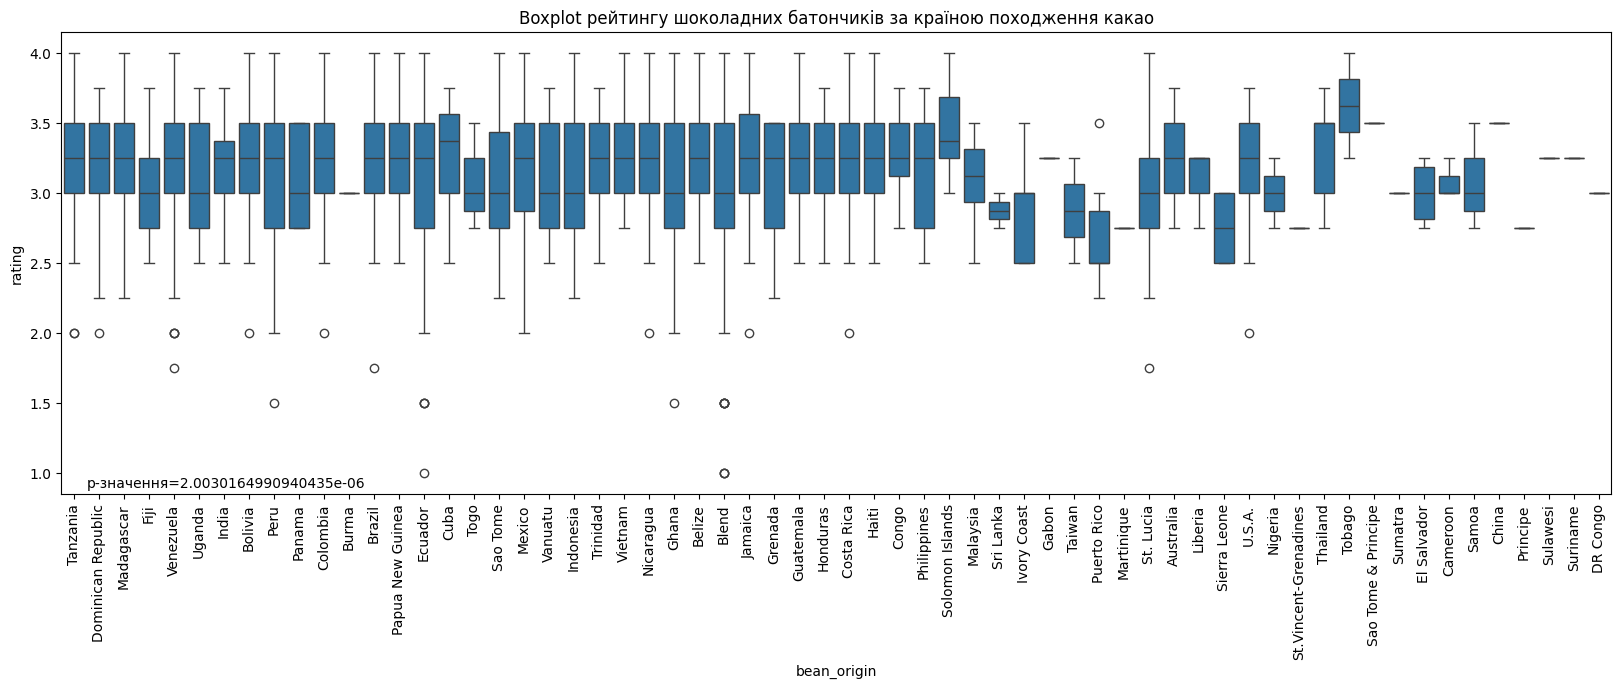

In [33]:
from scipy.stats import kruskal

# Групуємо дані за місцем розташування компанії
grouped_data = df.groupby('num_ingredients')['rating'].apply(list)

# Виконуємо Краскела-Уолліса
stat, p_value = kruskal(*grouped_data)

# Виводимо результат
print(f"Статистика={stat}, p-значення={p_value}")

# Інтерпретація результату
alpha = 0.05
if p_value < alpha:
    print("Відхиляємо нульову гіпотезу, що середні рейтинги рівні")
else:
    print("Не відхиляємо нульову гіпотезу, що середні рейтинги рівні")
# Створення графіка
plt.figure(figsize=(20, 6))
sns.boxplot(x='bean_origin', y='rating', data=df)
plt.title('Boxplot рейтингу шоколадних батончиків за країною походження какао')
plt.xticks(rotation=90)
# Додаємо p-значення на діаграму
plt.text(0.5, 0.9, f"p-значення={p_value}")
plt.show()



In [34]:
grouped_data = df.groupby('manufacturer')['rating'].apply(list)

# Виконуємо Краскела-Уолліса
stat, p_value = kruskal(*grouped_data)

# Виводимо результат
print(f"Статистика={stat}, p-значення={p_value}")

# Інтерпретація результату
alpha = 0.05
if p_value < alpha:
    print("Відхиляємо нульову гіпотезу, що середні рейтинги рівні")
else:
    print("Не відхиляємо нульову гіпотезу, що середні рейтинги рівні")

Статистика=1088.311048426461, p-значення=1.4830080988416808e-33
Відхиляємо нульову гіпотезу, що середні рейтинги рівні


In [35]:
grouped_data = df.groupby('ingredients')['rating'].apply(list)

# Виконуємо Краскела-Уолліса
stat, p_value = kruskal(*grouped_data)

# Виводимо результат
print(f"Статистика={stat}, p-значення={p_value}")

# Інтерпретація результату
alpha = 0.05
if p_value < alpha:
    print("Відхиляємо нульову гіпотезу, що середні рейтинги рівні")
else:
    print("Не відхиляємо нульову гіпотезу, що середні рейтинги рівні")

Статистика=99.30755144636187, p-значення=1.6752063580989306e-12
Відхиляємо нульову гіпотезу, що середні рейтинги рівні


In [36]:
from scipy.stats import f_oneway

# Дані для тесту
data_grouped = df.groupby('bean_origin')['rating'].apply(list)

# ANOVA
f_statistic, p_value = f_oneway(*data_grouped)

# Вивід результатів
print("F-статистика:", f_statistic)
print("p-значення:", p_value)


F-статистика: 1.4337649823587595
p-значення: 0.01617071037738245


In [37]:

letters = ["B", "S", "T", "C", "V", "L", "Sa"]
# Створення стовпців зі значеннями 1 або 0
for letter in letters:
    df[letter] = df['ingredients'].str.contains(letter).astype(int)
df.head(10)

id manufacturer company_location  year_reviewed         bean_origin  \
0  2454         5150           U.S.A.           2019            Tanzania   
1  2458         5150           U.S.A.           2019  Dominican Republic   
2  2454         5150           U.S.A.           2019          Madagascar   
3  2542         5150           U.S.A.           2021                Fiji   
4  2546         5150           U.S.A.           2021           Venezuela   
5  2546         5150           U.S.A.           2021              Uganda   
6  2542         5150           U.S.A.           2021               India   
7   797     A. Morin           France           2012             Bolivia   
8   797     A. Morin           France           2012                Peru   
9  1011     A. Morin           France           2013              Panama   

                   bar_name  cocoa_percent  num_ingredients ingredients  \
0     Kokoa Kamili, batch 1           76.0              3.0       B,S,C   
1           Zorzal, batch 1           76.0              3.0       B,S,C   
2    Bejofo Estate, batch 1           76.0              3.0       B,S,C   
3     Matasawalevu, batch 1           68.0              3.0       B,S,C   
4     Sur del Lago, batch 1           72.0              3.0       B,S,C   
5  Semuliki Forest, batch 1           80.0              3.0       B,S,C   
6         Anamalai, batch 1           68.0              3.0       B,S,C   
7                   Bolivia           70.0              4.0     B,S,C,L   
8                      Peru           63.0              4.0     B,S,C,L   
9                    Panama           70.0              4.0     B,S,C,L   

                              review  rating  B  S  T  C  V  L  Sa  
0          rich cocoa, fatty, bready    3.25  1  1  0  1  0  0   0  
1             cocoa, vegetal, savory    3.50  1  1  0  1  0  0   0  
2       cocoa, blackberry, full body    3.75  1  1  0  1  0  0   0  
3                chewy, off, rubbery    3.00  1  1  0  1  0  0   0  
4  fatty, earthy, moss, nutty,chalky    3.00  1  1  0  1  0  0   0  
5  mildly bitter, basic cocoa, fatty    3.25  1  1  0  1  0  0   0  
6      milk brownie, macadamia,chewy    3.50  1  1  0  1  0  0   0  
7                     vegetal, nutty    3.50  1  1  0  1  0  1   0  
8              fruity, melon, roasty    3.75  1  1  0  1  0  1   0  
9    brief fruit note, earthy, nutty    2.75  1  1  0  1  0  1   0

In [38]:
numeric_data1 = df.select_dtypes(include=[float,int]).drop(columns=["id",'year_reviewed'])
numeric_data1.describe()

cocoa_percent  num_ingredients       rating       B            S  \
count    2530.000000      2530.000000  2530.000000  2530.0  2530.000000   
mean       71.639723         3.039921     3.196344     1.0     0.997233   
std         5.616724         0.897906     0.445321     0.0     0.052538   
min        42.000000         1.000000     1.000000     1.0     0.000000   
25%        70.000000         2.000000     3.000000     1.0     1.000000   
50%        70.000000         3.000000     3.250000     1.0     1.000000   
75%        74.000000         4.000000     3.500000     1.0     1.000000   
max       100.000000         6.000000     4.000000     1.0     1.000000   

            T            C            V            L           Sa  
count  2530.0  2530.000000  2530.000000  2530.000000  2530.000000  
mean      0.0     0.693676     0.139526     0.194862     0.014625  
std       0.0     0.461057     0.346563     0.396172     0.120068  
min       0.0     0.000000     0.000000     0.000000     0.000000  
25%       0.0     0.000000     0.000000     0.000000     0.000000  
50%       0.0     1.000000     0.000000     0.000000     0.000000  
75%       0.0     1.000000     0.000000     0.000000     0.000000  
max       0.0     1.000000     1.000000     1.000000     1.000000

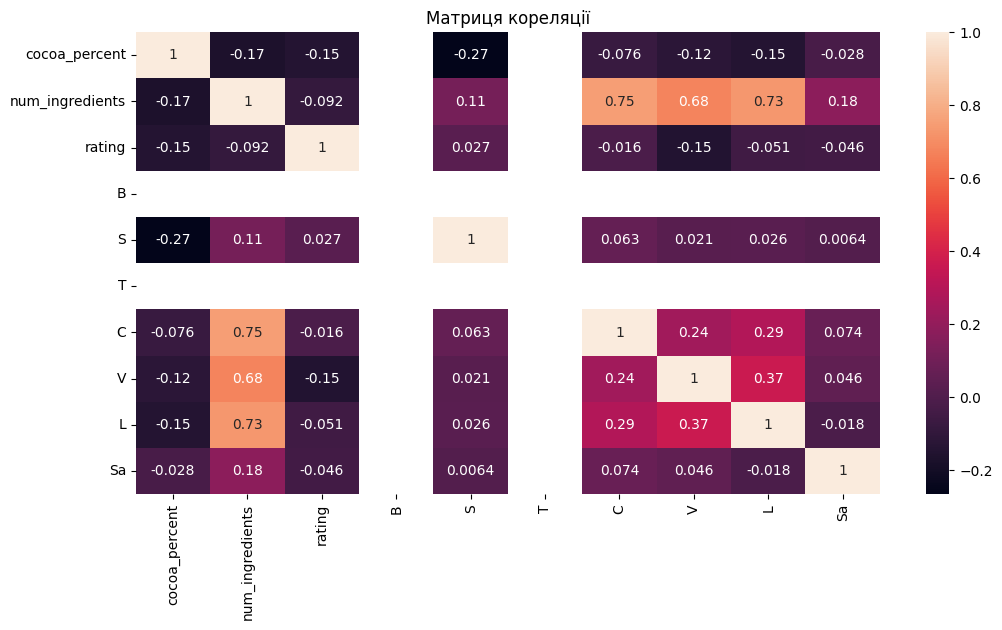

In [39]:
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data1.corr(),annot=True)
plt.title('Матриця кореляції')
plt.show()

In [40]:
# Розділити кожен відгук на окремі слова
words = df['review'].str.split(r'\s*,\s*', expand=True).stack()
word_counts = words.value_counts()
top_words = word_counts[word_counts >= 100].index.tolist()

for word in top_words:
    df[word] = df['review'].str.contains(word).astype(int)

In [41]:
words.value_counts()

sweet           273
nutty           261
cocoa           252
roasty          213
earthy          190
               ... 
intens            1
slight plum       1
too few nibs      1
late mocha        1
mild nuts         1
Name: count, Length: 972, dtype: int64

In [42]:
df.head(10)

id manufacturer company_location  year_reviewed         bean_origin  \
0  2454         5150           U.S.A.           2019            Tanzania   
1  2458         5150           U.S.A.           2019  Dominican Republic   
2  2454         5150           U.S.A.           2019          Madagascar   
3  2542         5150           U.S.A.           2021                Fiji   
4  2546         5150           U.S.A.           2021           Venezuela   
5  2546         5150           U.S.A.           2021              Uganda   
6  2542         5150           U.S.A.           2021               India   
7   797     A. Morin           France           2012             Bolivia   
8   797     A. Morin           France           2012                Peru   
9  1011     A. Morin           France           2013              Panama   

                   bar_name  cocoa_percent  num_ingredients ingredients  \
0     Kokoa Kamili, batch 1           76.0              3.0       B,S,C   
1           Zorzal, batch 1           76.0              3.0       B,S,C   
2    Bejofo Estate, batch 1           76.0              3.0       B,S,C   
3     Matasawalevu, batch 1           68.0              3.0       B,S,C   
4     Sur del Lago, batch 1           72.0              3.0       B,S,C   
5  Semuliki Forest, batch 1           80.0              3.0       B,S,C   
6         Anamalai, batch 1           68.0              3.0       B,S,C   
7                   Bolivia           70.0              4.0     B,S,C,L   
8                      Peru           63.0              4.0     B,S,C,L   
9                    Panama           70.0              4.0     B,S,C,L   

                              review  ...  cocoa  roasty  earthy  creamy  \
0          rich cocoa, fatty, bready  ...      1       0       0       0   
1             cocoa, vegetal, savory  ...      1       0       0       0   
2       cocoa, blackberry, full body  ...      1       0       0       0   
3                chewy, off, rubbery  ...      0       0       0       0   
4  fatty, earthy, moss, nutty,chalky  ...      0       0       1       0   
5  mildly bitter, basic cocoa, fatty  ...      1       0       0       0   
6      milk brownie, macadamia,chewy  ...      0       0       0       0   
7                     vegetal, nutty  ...      0       0       0       0   
8              fruity, melon, roasty  ...      0       1       0       0   
9    brief fruit note, earthy, nutty  ...      0       0       1       0   

   sandy  fatty  floral  intense  spicy  sour  
0      0      1       0        0      0     0  
1      0      0       0        0      0     0  
2      0      0       0        0      0     0  
3      0      0       0        0      0     0  
4      0      1       0        0      0     0  
5      0      1       0        0      0     0  
6      0      0       0        0      0     0  
7      0      0       0        0      0     0  
8      0      0       0        0      0     0  
9      0      0       0        0      0     0  

[10 rows x 30 columns]

In [43]:
from sklearn.preprocessing import StandardScaler
# Feature Engineering - Data Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Розрахунок квантилей та міжквартильного діапазону
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Виявлення викидів
outliers = ((df['rating'] < lower_bound) | (df['rating'] > upper_bound)).sum()
print(outliers)
# Фільтрація за межами викидів
dff = df.loc[(df['rating'] >= lower_bound) & (df['rating'] <= upper_bound)]

# Перерахунок викидів після фільтрації
outliers_filtered = ((dff['rating'] < lower_bound) | (dff['rating'] > upper_bound)).sum()
print(outliers_filtered)


50
0


In [44]:

numeric_data2 = dff.select_dtypes(include=[float,int]).drop(columns=["id",'year_reviewed'])

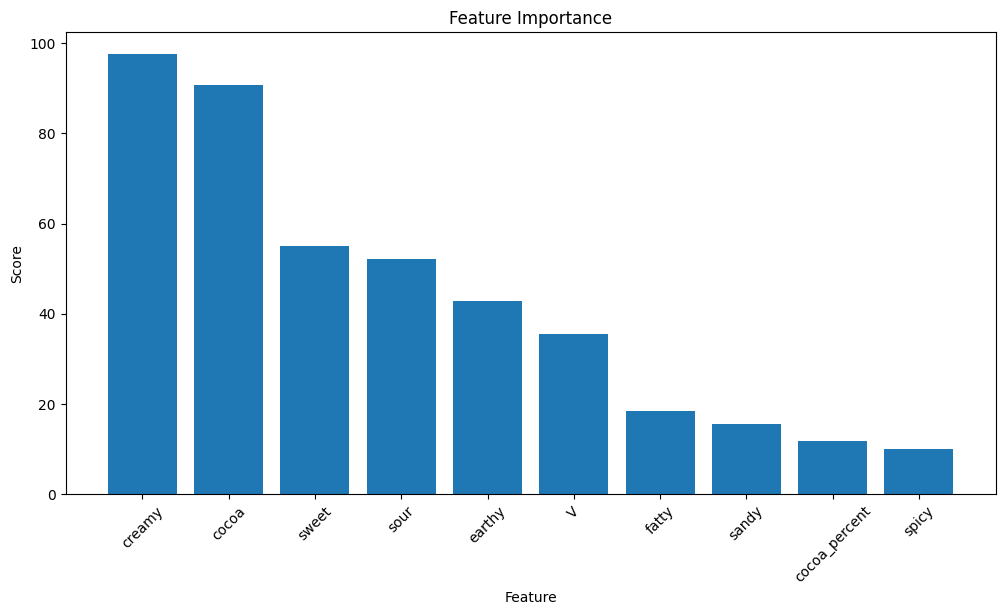

In [45]:
from sklearn.feature_selection import SelectKBest, f_regression

# Feature Importance
X = numeric_data2.drop('rating', axis=1)
y = numeric_data2['rating']
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_}).sort_values(by='Score', ascending=False)
feature_scores = feature_scores.head(10)  # виберіть перші 10 найбільш важливих ознак
plt.figure(figsize=(12, 6))
plt.bar(feature_scores['Feature'], feature_scores['Score'])
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

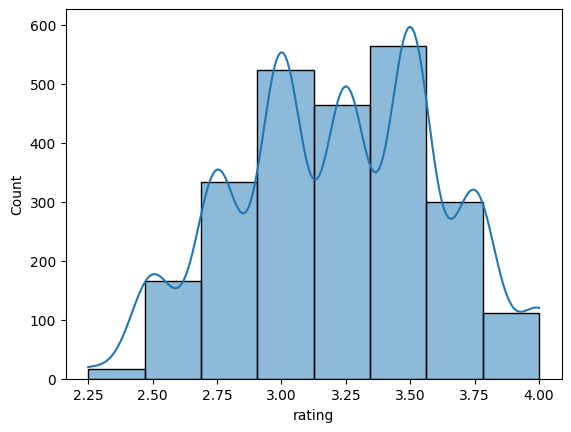

In [46]:
sns.histplot(data=dff, x='rating',kde=True,bins=8)

plt.show()

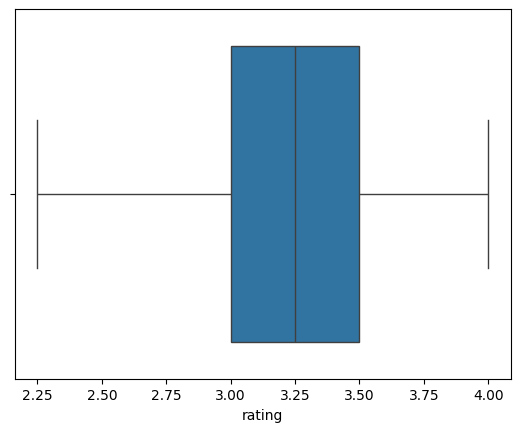

In [47]:
sns.boxplot(data=dff, x='rating')
plt.show()


In [48]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2480 entries, 0 to 2529
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2480 non-null   int64  
 1   manufacturer      2480 non-null   object 
 2   company_location  2480 non-null   object 
 3   year_reviewed     2480 non-null   int64  
 4   bean_origin       2480 non-null   object 
 5   bar_name          2480 non-null   object 
 6   cocoa_percent     2480 non-null   float64
 7   num_ingredients   2480 non-null   float64
 8   ingredients       2480 non-null   object 
 9   review            2480 non-null   object 
 10  rating            2480 non-null   float64
 11  B                 2480 non-null   int32  
 12  S                 2480 non-null   int32  
 13  T                 2480 non-null   int32  
 14  C                 2480 non-null   int32  
 15  V                 2480 non-null   int32  
 16  L                 2480 non-null   int32  
 17  

In [49]:
dff.head()

id manufacturer company_location  year_reviewed         bean_origin  \
0  2454         5150           U.S.A.           2019            Tanzania   
1  2458         5150           U.S.A.           2019  Dominican Republic   
2  2454         5150           U.S.A.           2019          Madagascar   
3  2542         5150           U.S.A.           2021                Fiji   
4  2546         5150           U.S.A.           2021           Venezuela   

                 bar_name  cocoa_percent  num_ingredients ingredients  \
0   Kokoa Kamili, batch 1           76.0              3.0       B,S,C   
1         Zorzal, batch 1           76.0              3.0       B,S,C   
2  Bejofo Estate, batch 1           76.0              3.0       B,S,C   
3   Matasawalevu, batch 1           68.0              3.0       B,S,C   
4   Sur del Lago, batch 1           72.0              3.0       B,S,C   

                              review  ...  cocoa  roasty  earthy  creamy  \
0          rich cocoa, fatty, bready  ...      1       0       0       0   
1             cocoa, vegetal, savory  ...      1       0       0       0   
2       cocoa, blackberry, full body  ...      1       0       0       0   
3                chewy, off, rubbery  ...      0       0       0       0   
4  fatty, earthy, moss, nutty,chalky  ...      0       0       1       0   

   sandy  fatty  floral  intense  spicy  sour  
0      0      1       0        0      0     0  
1      0      0       0        0      0     0  
2      0      0       0        0      0     0  
3      0      0       0        0      0     0  
4      0      1       0        0      0     0  

[5 rows x 30 columns]

In [50]:
for columns in dff.columns:
    print(columns,len(df[columns].unique()))

id 630
manufacturer 580
company_location 67
year_reviewed 16
bean_origin 62
bar_name 1605
cocoa_percent 46
num_ingredients 6
ingredients 21
review 2487
rating 12
B 1
S 2
T 1
C 2
V 2
L 2
Sa 2
sweet 2
nutty 2
cocoa 2
roasty 2
earthy 2
creamy 2
sandy 2
fatty 2
floral 2
intense 2
spicy 2
sour 2


In [51]:
dff['bean_origin'].unique()

array(['Tanzania', 'Dominican Republic', 'Madagascar', 'Fiji',
       'Venezuela', 'Uganda', 'India', 'Bolivia', 'Peru', 'Panama',
       'Colombia', 'Burma', 'Brazil', 'Papua New Guinea', 'Ecuador',
       'Cuba', 'Togo', 'Sao Tome', 'Mexico', 'Vanuatu', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Ghana', 'Belize', 'Blend',
       'Jamaica', 'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Haiti', 'Congo', 'Philippines', 'Solomon Islands', 'Malaysia',
       'Sri Lanka', 'Ivory Coast', 'Gabon', 'Taiwan', 'Puerto Rico',
       'Martinique', 'St. Lucia', 'Australia', 'Liberia', 'Sierra Leone',
       'U.S.A.', 'Nigeria', 'St.Vincent-Grenadines', 'Thailand', 'Tobago',
       'Sao Tome & Principe', 'Sumatra', 'El Salvador', 'Cameroon',
       'Samoa', 'China', 'Principe', 'Sulawesi', 'Suriname', 'DR Congo'],
      dtype=object)

попросимо чат гпт посортувати їх по континентах

In [52]:
asia = ['Vietnam', 'Indonesia', 'Sri Lanka', 'Malaysia', 'Philippines', 'India', 'Taiwan', 'Thailand', 'Sumatra', 'Sulawesi']
africa = ['Tanzania', 'Madagascar', 'Fiji', 'Uganda', 'Burma', 'Ghana', 'Nigeria', 'Liberia', 'Sierra Leone', 'Ivory Coast', 'Gabon', 'Sao Tome', 'Sao Tome & Principe', 'Cameroon', 'Sao Tome & Principe', 'DR Congo']
america = ['Dominican Republic', 'Venezuela', 'Peru', 'Bolivia', 'Panama', 'Colombia', 'Brazil', 'Ecuador', 'Cuba', 'Mexico', 'Nicaragua', 'Belize', 'Jamaica', 'Grenada', 'Guatemala', 'Honduras', 'Costa Rica', 'Haiti', 'Puerto Rico', 'Martinique', 'St. Lucia', 'St.Vincent-Grenadines', 'El Salvador', 'Suriname', 'DR Congo']
oceania = ['Vanuatu', 'Papua New Guinea', 'Solomon Islands', 'Samoa', 'Australia']

In [53]:
dff['asia'] = dff['bean_origin'].apply(lambda x: 1 if x in asia else 0)
dff['africa'] =  dff['bean_origin'].apply(lambda x: 1 if x in africa else 0)
df['america'] =  dff['bean_origin'].apply(lambda x: 1 if x in america else 0)
dff['oceania'] =  dff['bean_origin'].apply(lambda x: 1 if x in oceania else 0)

dff['dark_choc'] = dff['cocoa_percent'].apply(lambda x: 1 if x > 60 else 0)
dff['milk_choc'] = dff['cocoa_percent'].apply(lambda x: 1 if x <= 60 else 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19532\2810799979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['asia'] = dff['bean_origin'].apply(lambda x: 1 if x in asia else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19532\2810799979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['africa'] =  dff['bean_origin'].apply(lambda x: 1 if x in africa else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19532\2810799979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [54]:
dff.head(10)

id manufacturer company_location  year_reviewed         bean_origin  \
0  2454         5150           U.S.A.           2019            Tanzania   
1  2458         5150           U.S.A.           2019  Dominican Republic   
2  2454         5150           U.S.A.           2019          Madagascar   
3  2542         5150           U.S.A.           2021                Fiji   
4  2546         5150           U.S.A.           2021           Venezuela   
5  2546         5150           U.S.A.           2021              Uganda   
6  2542         5150           U.S.A.           2021               India   
7   797     A. Morin           France           2012             Bolivia   
8   797     A. Morin           France           2012                Peru   
9  1011     A. Morin           France           2013              Panama   

                   bar_name  cocoa_percent  num_ingredients ingredients  \
0     Kokoa Kamili, batch 1           76.0              3.0       B,S,C   
1           Zorzal, batch 1           76.0              3.0       B,S,C   
2    Bejofo Estate, batch 1           76.0              3.0       B,S,C   
3     Matasawalevu, batch 1           68.0              3.0       B,S,C   
4     Sur del Lago, batch 1           72.0              3.0       B,S,C   
5  Semuliki Forest, batch 1           80.0              3.0       B,S,C   
6         Anamalai, batch 1           68.0              3.0       B,S,C   
7                   Bolivia           70.0              4.0     B,S,C,L   
8                      Peru           63.0              4.0     B,S,C,L   
9                    Panama           70.0              4.0     B,S,C,L   

                              review  ...  fatty  floral  intense  spicy  \
0          rich cocoa, fatty, bready  ...      1       0        0      0   
1             cocoa, vegetal, savory  ...      0       0        0      0   
2       cocoa, blackberry, full body  ...      0       0        0      0   
3                chewy, off, rubbery  ...      0       0        0      0   
4  fatty, earthy, moss, nutty,chalky  ...      1       0        0      0   
5  mildly bitter, basic cocoa, fatty  ...      1       0        0      0   
6      milk brownie, macadamia,chewy  ...      0       0        0      0   
7                     vegetal, nutty  ...      0       0        0      0   
8              fruity, melon, roasty  ...      0       0        0      0   
9    brief fruit note, earthy, nutty  ...      0       0        0      0   

   sour  asia  africa  oceania  dark_choc  milk_choc  
0     0     0       1        0          1          0  
1     0     0       0        0          1          0  
2     0     0       1        0          1          0  
3     0     0       1        0          1          0  
4     0     0       0        0          1          0  
5     0     0       1        0          1          0  
6     0     1       0        0          1          0  
7     0     0       0        0          1          0  
8     0     0       0        0          1          0  
9     0     0       0        0          1          0  

[10 rows x 35 columns]

In [55]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2480 entries, 0 to 2529
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2480 non-null   int64  
 1   manufacturer      2480 non-null   object 
 2   company_location  2480 non-null   object 
 3   year_reviewed     2480 non-null   int64  
 4   bean_origin       2480 non-null   object 
 5   bar_name          2480 non-null   object 
 6   cocoa_percent     2480 non-null   float64
 7   num_ingredients   2480 non-null   float64
 8   ingredients       2480 non-null   object 
 9   review            2480 non-null   object 
 10  rating            2480 non-null   float64
 11  B                 2480 non-null   int32  
 12  S                 2480 non-null   int32  
 13  T                 2480 non-null   int32  
 14  C                 2480 non-null   int32  
 15  V                 2480 non-null   int32  
 16  L                 2480 non-null   int32  
 17  

In [56]:
dff.head(10)


id manufacturer company_location  year_reviewed         bean_origin  \
0  2454         5150           U.S.A.           2019            Tanzania   
1  2458         5150           U.S.A.           2019  Dominican Republic   
2  2454         5150           U.S.A.           2019          Madagascar   
3  2542         5150           U.S.A.           2021                Fiji   
4  2546         5150           U.S.A.           2021           Venezuela   
5  2546         5150           U.S.A.           2021              Uganda   
6  2542         5150           U.S.A.           2021               India   
7   797     A. Morin           France           2012             Bolivia   
8   797     A. Morin           France           2012                Peru   
9  1011     A. Morin           France           2013              Panama   

                   bar_name  cocoa_percent  num_ingredients ingredients  \
0     Kokoa Kamili, batch 1           76.0              3.0       B,S,C   
1           Zorzal, batch 1           76.0              3.0       B,S,C   
2    Bejofo Estate, batch 1           76.0              3.0       B,S,C   
3     Matasawalevu, batch 1           68.0              3.0       B,S,C   
4     Sur del Lago, batch 1           72.0              3.0       B,S,C   
5  Semuliki Forest, batch 1           80.0              3.0       B,S,C   
6         Anamalai, batch 1           68.0              3.0       B,S,C   
7                   Bolivia           70.0              4.0     B,S,C,L   
8                      Peru           63.0              4.0     B,S,C,L   
9                    Panama           70.0              4.0     B,S,C,L   

                              review  ...  fatty  floral  intense  spicy  \
0          rich cocoa, fatty, bready  ...      1       0        0      0   
1             cocoa, vegetal, savory  ...      0       0        0      0   
2       cocoa, blackberry, full body  ...      0       0        0      0   
3                chewy, off, rubbery  ...      0       0        0      0   
4  fatty, earthy, moss, nutty,chalky  ...      1       0        0      0   
5  mildly bitter, basic cocoa, fatty  ...      1       0        0      0   
6      milk brownie, macadamia,chewy  ...      0       0        0      0   
7                     vegetal, nutty  ...      0       0        0      0   
8              fruity, melon, roasty  ...      0       0        0      0   
9    brief fruit note, earthy, nutty  ...      0       0        0      0   

   sour  asia  africa  oceania  dark_choc  milk_choc  
0     0     0       1        0          1          0  
1     0     0       0        0          1          0  
2     0     0       1        0          1          0  
3     0     0       1        0          1          0  
4     0     0       0        0          1          0  
5     0     0       1        0          1          0  
6     0     1       0        0          1          0  
7     0     0       0        0          1          0  
8     0     0       0        0          1          0  
9     0     0       0        0          1          0  

[10 rows x 35 columns]

In [57]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2480 entries, 0 to 2529
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2480 non-null   int64  
 1   manufacturer      2480 non-null   object 
 2   company_location  2480 non-null   object 
 3   year_reviewed     2480 non-null   int64  
 4   bean_origin       2480 non-null   object 
 5   bar_name          2480 non-null   object 
 6   cocoa_percent     2480 non-null   float64
 7   num_ingredients   2480 non-null   float64
 8   ingredients       2480 non-null   object 
 9   review            2480 non-null   object 
 10  rating            2480 non-null   float64
 11  B                 2480 non-null   int32  
 12  S                 2480 non-null   int32  
 13  T                 2480 non-null   int32  
 14  C                 2480 non-null   int32  
 15  V                 2480 non-null   int32  
 16  L                 2480 non-null   int32  
 17  

In [58]:
dd = dff.drop(columns=['id','manufacturer','company_location','year_reviewed','bean_origin','bar_name','ingredients','review','rating'])

In [59]:
dd.head(20)

cocoa_percent  num_ingredients  B  S  T  C  V  L  Sa  sweet  ...  fatty  \
0            76.0              3.0  1  1  0  1  0  0   0      0  ...      1   
1            76.0              3.0  1  1  0  1  0  0   0      0  ...      0   
2            76.0              3.0  1  1  0  1  0  0   0      0  ...      0   
3            68.0              3.0  1  1  0  1  0  0   0      0  ...      0   
4            72.0              3.0  1  1  0  1  0  0   0      0  ...      1   
5            80.0              3.0  1  1  0  1  0  0   0      0  ...      1   
6            68.0              3.0  1  1  0  1  0  0   0      0  ...      0   
7            70.0              4.0  1  1  0  1  0  1   0      0  ...      0   
8            63.0              4.0  1  1  0  1  0  1   0      0  ...      0   
9            70.0              4.0  1  1  0  1  0  1   0      0  ...      0   
10           70.0              4.0  1  1  0  1  0  1   0      0  ...      0   
11           70.0              4.0  1  1  0  1  0  1   0      0  ...      0   
12           70.0              4.0  1  1  0  1  0  1   0      0  ...      0   
13           70.0              4.0  1  1  0  1  0  1   0      0  ...      0   
14           70.0              4.0  1  1  0  1  0  1   0      0  ...      0   
15           70.0              4.0  1  1  0  1  0  1   0      0  ...      0   
16           70.0              4.0  1  1  0  1  0  1   0      0  ...      0   
17           70.0              4.0  1  1  0  1  0  1   0      0  ...      0   
18           70.0              4.0  1  1  0  1  0  1   0      0  ...      0   
19           63.0              3.0  1  1  0  1  0  0   0      1  ...      0   

    floral  intense  spicy  sour  asia  africa  oceania  dark_choc  milk_choc  
0        0        0      0     0     0       1        0          1          0  
1        0        0      0     0     0       0        0          1          0  
2        0        0      0     0     0       1        0          1          0  
3        0        0      0     0     0       1        0          1          0  
4        0        0      0     0     0       0        0          1          0  
5        0        0      0     0     0       1        0          1          0  
6        0        0      0     0     1       0        0          1          0  
7        0        0      0     0     0       0        0          1          0  
8        0        0      0     0     0       0        0          1          0  
9        0        0      0     0     0       0        0          1          0  
10       0        0      0     0     0       0        0          1          0  
11       0        0      0     1     0       1        0          1          0  
12       0        0      0     0     0       1        0          1          0  
13       0        0      0     0     0       0        0          1          0  
14       0        0      0     0     0       0        1          1          0  
15       0        0      0     0     0       0        0          1          0  
16       0        1      0     1     0       0        0          1          0  
17       0        0      0     0     0       0        0          1          0  
18       0        0      0     0     0       0        0          1          0  
19       0        0      0     0     0       0        0          1          0  

[20 rows x 26 columns]

In [60]:
dd.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2480 entries, 0 to 2529
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cocoa_percent    2480 non-null   float64
 1   num_ingredients  2480 non-null   float64
 2   B                2480 non-null   int32  
 3   S                2480 non-null   int32  
 4   T                2480 non-null   int32  
 5   C                2480 non-null   int32  
 6   V                2480 non-null   int32  
 7   L                2480 non-null   int32  
 8   Sa               2480 non-null   int32  
 9   sweet            2480 non-null   int32  
 10  nutty            2480 non-null   int32  
 11  cocoa            2480 non-null   int32  
 12  roasty           2480 non-null   int32  
 13  earthy           2480 non-null   int32  
 14  creamy           2480 non-null   int32  
 15  sandy            2480 non-null   int32  
 16  fatty            2480 non-null   int32  
 17  floral           24

In [61]:
from sklearn.model_selection import train_test_split
feature = dd
labels = dff['rating']

X_train, X_test, y_train, y_test = train_test_split(feature, labels, test_size = 0.2, random_state = 0)

In [83]:
from sklearn_pandas import gen_features



numerical_features = gen_features(
    columns=[[col] for col in dd[['cocoa_percent','num_ingredients']].columns],
    classes=[
        {'class': StandardScaler}
    ]
)
categorical_features = gen_features(
    columns=[[col] for col in dd.columns if col not in ['cocoa_percent', 'num_ingredients']]
)


In [84]:
from sklearn_pandas import DataFrameMapper
mapper2 = DataFrameMapper(
  numerical_features + categorical_features, df_out= True, default=False)


In [85]:

mapper2.fit(X_train)
X_train_scaled = mapper2.transform(X_train)
X_test_scaled = mapper2.transform(X_test)

In [86]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

LinReg.fit(X_train_scaled, y_train)
predictions = LinReg.predict(X_test_scaled)
r2 = LinReg.score(X_test_scaled, y_test)
print("score:", r2)

score: 0.2066766902713555


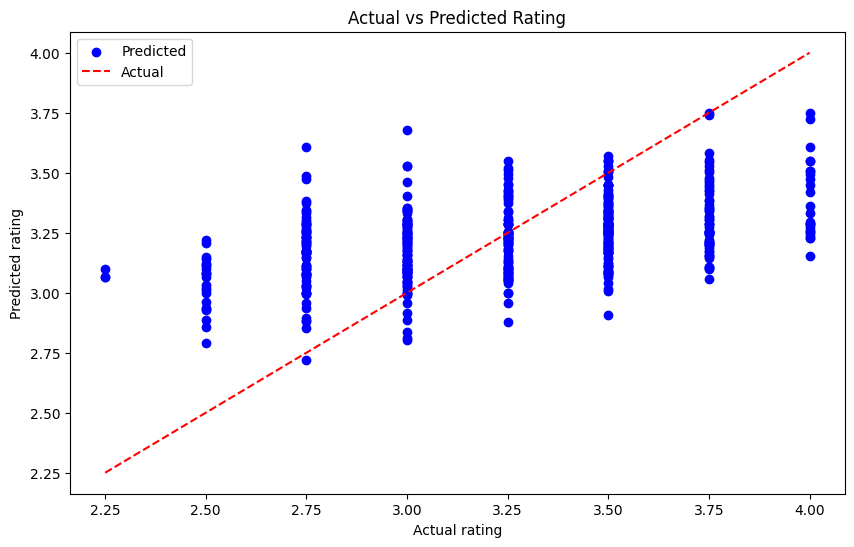

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Actual')
plt.title('Actual vs Predicted Rating')
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.legend()
plt.show()

In [88]:
print("X_train:")
print(X_train_scaled)




X_train:
      cocoa_percent  num_ingredients  B  S  T  C  V  L  Sa  sweet  nutty  \
2084       0.265153        -0.030650  1  1  0  1  0  0   0      0      0   
1849       0.826089         1.095455  1  1  0  1  0  1   0      0      0   
1006      -0.669740        -0.030650  1  1  0  1  0  0   0      0      0   
1004      -0.295782        -0.030650  1  1  0  1  0  0   0      0      0   
2428       1.013068        -1.156755  1  1  0  0  0  0   0      0      0   
...             ...              ... .. .. .. .. .. ..  ..    ...    ...   
1050       0.639111        -0.030650  1  1  0  1  0  0   0      0      0   
1765      -0.108804        -0.030650  1  1  0  1  0  0   0      0      0   
777       -0.295782        -1.156755  1  1  0  0  0  0   0      0      0   
849       -0.295782        -1.156755  1  1  0  0  0  0   0      0      0   
1686       0.078175        -1.156755  1  1  0  0  0  0   0      0      0   

      cocoa  roasty  earthy  creamy  sandy  fatty  floral  intense  spicy  \
2

In [89]:
print("y_train:")
print(y_train)

y_train:
2084    3.75
1849    3.00
1006    3.50
1004    3.25
2428    2.75
        ... 
1050    3.50
1765    3.00
777     3.00
849     3.50
1686    3.00
Name: rating, Length: 1984, dtype: float64


In [90]:

print("Predictions:")
print(predictions)

Predictions:
[3.34086607 3.11952988 3.4201786  3.12005834 2.91583776 3.39652801
 3.16931009 3.28433418 3.29370008 3.47758835 3.39418534 3.34120349
 3.52647457 3.22996318 3.26834276 3.12711918 3.19797556 3.37245156
 2.90631038 3.17572028 3.30658946 3.03068377 3.27447376 3.13349581
 3.19797556 3.06620784 3.40673303 3.00056807 3.45935444 3.28433418
 3.30893973 3.47619304 3.16856752 3.24462989 3.30642453 3.30268397
 3.38679567 3.31918091 3.22762051 2.99231953 3.48427225 3.11166208
 3.28433418 3.22869596 3.25361378 3.15476767 3.450899   3.54872986
 3.04898569 3.09959077 3.1687641  2.99746924 3.27053433 3.28433418
 3.18780212 3.450899   3.11124052 3.22908432 3.18791623 3.55227889
 3.16459264 3.08017552 3.25361378 3.42369581 3.72383746 3.14215232
 3.51267472 3.07252214 3.0795128  3.33467159 2.95721751 3.37585364
 3.05541881 3.52774179 3.02821264 3.33157578 3.50800102 3.38698129
 2.72126264 3.450899   3.07733548 3.04922497 3.10277541 3.31671015
 3.09744067 2.85184166 3.27201698 3.1651579  2.99

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Відбір топ-3 відібраних змінних на базі коефіцієнта кореляції
top3_corr_features = numeric_data1.corr()['rating'].abs().nlargest(4)[1:].index
# Розділення даних на тренувальну та тестову вибірку
X_train_corr = X_train_scaled[top3_corr_features]
y_train_corr = y_train
X_test_corr = X_test_scaled[top3_corr_features]
y_test_corr = y_test

# Навчання моделі на 3 відібраних змінних на базі коефіцієнта кореляції
model_corr = LinearRegression()
model_corr.fit(X_train_corr, y_train_corr)

# Прогноз на тестовій вибірці
predictions_corr = model_corr.predict(X_test_corr)

# Обчислення метрик для моделі на 3 відібраних змінних на базі коефіцієнта кореляції
mae = mean_absolute_error(y_test, predictions_corr)
mse_corr = mean_squared_error(y_test_corr, predictions_corr)
r2_corr = r2_score(y_test_corr, predictions_corr)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (Correlation):", mse_corr)
print("R-squared (Correlation):", r2_corr)

Mean Absolute Error (MAE): 0.3258492526284954
Mean Squared Error (Correlation): 0.15349406186777945
R-squared (Correlation): 0.012835722048894604


In [92]:
selected_features = top3_corr_features
print("Selected features:", selected_features)

Selected features: Index(['V', 'cocoa_percent', 'num_ingredients'], dtype='object')


In [114]:
# Відбір топ-3  змінних з використанням SelectKBest
selector = SelectKBest(score_func=f_regression, k=3)
selector.fit(X_train_scaled, y_train)
top3_features = X_train_scaled.columns[selector.get_support()]

# Розділення даних на тренувальну та тестову вибірку
X_train_kbest = X_train_scaled[top3_features]
y_train_kbest = y_train
X_test_kbest = X_test_scaled[top3_features]
y_test_kbest = y_test

# Навчання моделі на 3 відібраних змінних з використанням SelectKBest
model_kbest = LinearRegression()
model_kbest.fit(X_train_kbest, y_train_kbest)

# Прогноз на тестовій вибірці
predictions_kbest = model_kbest.predict(X_test_kbest)

# Обчислення метрик для моделі на 3 відібраних змінних з використанням SelectKBest
mae = mean_absolute_error(y_test, predictions_kbest)
mse_kbest = mean_squared_error(y_test_kbest, predictions_kbest)
r2_kbest = r2_score(y_test_kbest, predictions_kbest)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (SelectKBest):", mse_kbest)
print("R-squared (SelectKBest):", r2_kbest)


Mean Absolute Error (MAE): 0.31849119075602167
Mean Squared Error (SelectKBest): 0.14153313922560784
R-squared (SelectKBest): 0.0897598415881854


In [115]:
selected_features = X_train_scaled.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['sweet', 'cocoa', 'creamy'], dtype='object')


In [116]:

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R²:", r_squared)

Mean Absolute Error (MAE): 0.2916269619033018
Mean Squared Error (MSE): 0.12335375165456651
R²: 0.2066766902713555


Побудувати модель L1-регуляризованої лінійної регресії Lasso

In [133]:
from sklearn import linear_model

lasso_model = linear_model.Lasso(alpha=1.0, max_iter=10000) 
lasso_model.fit(X_train_scaled, y_train)
r2_l = lasso_model.score(X_test_scaled, y_test)
print("r2:", r2_l)

r2: -0.00559147321778708


In [109]:
from sklearn.model_selection import GridSearchCV
lasso_model = linear_model.Lasso(max_iter=10000) 
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(lasso_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]})

In [132]:
best_alpha = grid_search.best_params_['alpha']
lasso_tuned = linear_model.Lasso(alpha=best_alpha)
lasso_tuned.fit(X_train_scaled, y_train)
r2_t = lasso_tuned.score(X_test_scaled, y_test)
print("Best Alpha:", best_alpha)
print("r2:", r2_t)


Best Alpha: 0.1
r2: -0.00559147321778708


In [131]:
predictions_lasso = lasso_tuned.predict(X_test_scaled)
mae_lasso = mean_absolute_error(y_test, predictions_lasso)
mse_lasso = mean_squared_error(y_test, predictions_lasso)
r2_lasso = r2_score(y_test, predictions_lasso)

print("mean_absolute_error (MAE):", mae_lasso)
print("Mean Squared Error (MSE):", mse_lasso)
print("Coefficient of Determination (R^2):", r2_lasso)

mean_absolute_error (MAE): 0.3327100676378773
Mean Squared Error (MSE): 0.15635930437451223
Coefficient of Determination (R^2): -0.00559147321778708


Обчислити лишки на тестовій вибірці, провести аналіз лишків (нормальність розподілу, незалежність від вихідної змінної) [API: 6];

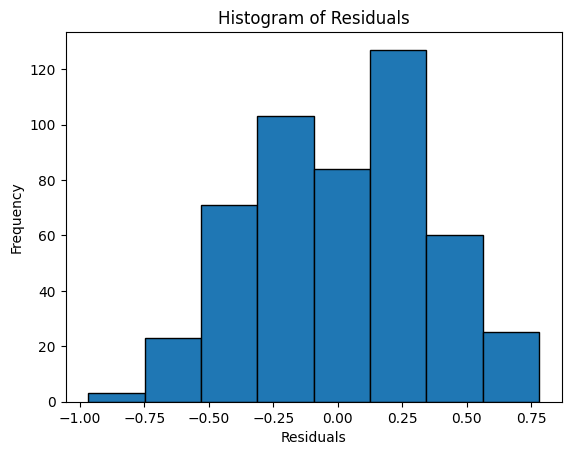

In [126]:
residuals1 = y_test - predictions_lasso
plt.hist(residuals1, bins=8, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [134]:
from sklearn.linear_model import Ridge
# GridSearch для пошуку найкращого alpha
ridge_model = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_alpha = grid_search.best_params_['alpha']

# Навчання моделі Ridge-регресії з кращим alpha
ridge_tuned = Ridge(alpha=best_alpha)
ridge_tuned.fit(X_train_scaled, y_train)

# Оцінка моделі
predictions_ridge = ridge_tuned.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, predictions_ridge)
r2_ridge = r2_score(y_test, predictions_ridge)

# Вивід результатів
print("Best Alpha:", best_alpha)
print("Mean Squared Error (MSE) Ridge:", mse_ridge)
print("Coefficient of Determination (R^2) Ridge:", r2_ridge)

Best Alpha: 10.0
Mean Squared Error (MSE) Ridge: 0.12385117640308445
Coefficient of Determination (R^2) Ridge: 0.20347760923375346
